The agency needs answers to several questions. The answers to those questions must be supported by data and analytics. These are their questions:

- Which type of complaint should the Department of Housing Preservation and Development of New York City focus on first?

- Should the Department of Housing Preservation and Development of New York City focus on any particular set of boroughs, ZIP codes, or street (where the complaints are severe) for the specific type of complaints you identified in response to Question 1?

- Does the Complaint Type that you identified in response to question 1 have an obvious relationship with any particular characteristic or characteristics of the houses or buildings?

- Can a predictive model be built for a future prediction of the possibility of complaints of the type that you have identified in response to question 1?


Your organization has assigned you as the lead data scientist to provide the answers to these questions. You need to work on getting answers to them in this Capstone Project by following the standard approach of data science and machine learning.

**Objective for Exercise:**

Use your data visualization skills to visualize the data and extract meaningful patterns to guide the modelling process.


The goal of this exercise is to find the answer to the Question 3 of the problem statement:

**Does the Complaint Type that you identified in response to Question 1 have an obvious relationship with any particular characteristic or characteristic of the Houses?**

In this exercise, use the 311 dataset.

You also need to read back the PLUTO dataset from Cloud Object Store that you saved previously in the course. Use the PLUTO dataset for the borough that you already identified to focus on the last exercise.Ensure that you use only a limited number of fields from the dataset so that you are not consuming too much memory during your analysis.

The recommended fields are Address, BldgArea, BldgDepth, BuiltFAR, CommFAR, FacilFAR, Lot, LotArea, LotDepth, NumBldgs, NumFloors, OfficeArea, ResArea, ResidFAR, RetailArea, YearBuilt, YearAlter1, ZipCode, YCoord, and XCoord.

At the end of this exercise, you should determine whether the type of complaint that you have identified as the response to Question 1 has an obvious relationship with any particular characteristic or characteristics of the houses.

### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import datetime

%matplotlib inline
sns.set_style('dark')
sns.set(font_scale=1.2)

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns',None)
#pd.set_option('display.max_rows',None)

np.random.seed(0)
np.set_printoptions(suppress=True)

### Load BX Dataset and keep the relevant columns

In [2]:
bx = pd.read_csv("BX_18v1.csv", na_values=np.nan)

In [3]:
bx

,Borough,Block,Lot,CD,CT2010,CB2010,SchoolDist,Council,ZipCode,FireComp,PolicePrct,HealthCenterDistrict,HealthArea,SanitBoro,SanitDistrict,SanitSub,Address,ZoneDist1,ZoneDist2,ZoneDist3,ZoneDist4,Overlay1,Overlay2,SPDist1,SPDist2,SPDist3,LtdHeight,SplitZone,BldgClass,LandUse,Easements,OwnerType,OwnerName,LotArea,BldgArea,ComArea,ResArea,OfficeArea,RetailArea,GarageArea,StrgeArea,FactryArea,OtherArea,AreaSource,NumBldgs,NumFloors,UnitsRes,UnitsTotal,LotFront,LotDepth,BldgFront,BldgDepth,Ext,ProxCode,IrrLotCode,LotType,BsmtCode,AssessLand,AssessTot,ExemptLand,ExemptTot,YearBuilt,YearAlter1,YearAlter2,HistDist,Landmark,BuiltFAR,ResidFAR,CommFAR,FacilFAR,BoroCode,BBL,CondoNo,Tract2010,XCoord,YCoord,ZoneMap,ZMCode,Sanborn,TaxMap,EDesigNum,APPBBL,APPDate,PLUTOMapID,FIRM07_FLAG,PFIRM15_FLAG,Version
0,BX,2260,1,201,19.0,1022.0,7.0,8.0,10454.0,L029,40.0,23.0,4700.0,2.0,1.0,2A,122 BRUCKNER BOULEVARD,M1-5/R8A,NaN,NaN,NaN,NaN,NaN,MX-1,NaN,NaN,NaN,N,Z9,NaN,0,NaN,122 BRUCKNER PARTNERS,15000,0,0,0,0,0,0,0,0,0,7,1,0.0,0,0,75.00,200.0,0.0,0.0,NaN,0.0,N,3.0,0.0,130500,161100,0,0,0,0,0,NaN,NaN,0.00,6.02,5.0,6.5,2,2022600001,0,19,1005957.0,232162.0,6b,NaN,209S016,20901.0,E-143,0.0,NaN,1,NaN,NaN,18V1
1,BX,2260,4,201,19.0,1022.0,7.0,8.0,10454.0,L029,40.0,23.0,4700.0,2.0,1.0,2A,126 BRUCKNER BOULEVARD,M1-5/R8A,NaN,NaN,NaN,NaN,NaN,MX-1,NaN,NaN,NaN,N,G5,7.0,0,NaN,24 INDIAN HEAD HOLDIN,13770,752,752,0,272,0,0,480,0,0,2,2,1.0,0,1,137.58,100.0,16.0,16.0,NaN,0.0,N,5.0,0.0,117000,326700,0,0,1931,1994,0,NaN,NaN,0.05,6.02,5.0,6.5,2,2022600004,0,19,1006076.0,232156.0,6b,NaN,209S016,20901.0,E-143,0.0,NaN,1,NaN,NaN,18V1
2,BX,2260,10,201,19.0,1022.0,7.0,8.0,10454.0,L029,40.0,23.0,4700.0,2.0,1.0,2A,138 BRUCKNER BOULEVARD,M1-5/R8A,NaN,NaN,NaN,NaN,NaN,MX-1,NaN,NaN,NaN,N,F5,6.0,0,P,ANJOST CORP,35000,39375,39375,0,0,0,0,0,39375,0,2,1,2.0,0,1,175.00,200.0,175.0,200.0,NaN,0.0,N,4.0,0.0,153000,879300,0,0,1931,0,0,NaN,NaN,1.13,6.02,5.0,6.5,2,2022600010,0,19,1006187.0,232036.0,6b,NaN,209S016,20901.0,E-143,0.0,NaN,1,NaN,NaN,18V1
3,BX,2260,17,201,19.0,1022.0,7.0,8.0,10454.0,L029,40.0,23.0,4700.0,2.0,1.0,2A,144 BRUCKNER BOULEVARD,M1-5/R8A,NaN,NaN,NaN,NaN,NaN,MX-1,NaN,NaN,NaN,N,C1,2.0,0,NaN,144 BRUCKNER LLC,2500,12500,0,12500,0,0,0,0,0,0,2,1,5.0,15,15,25.00,100.0,25.0,85.0,NaN,0.0,N,5.0,0.0,51300,332550,0,0,1931,2001,0,NaN,NaN,5.00,6.02,5.0,6.5,2,2022600017,0,19,1006299.0,232033.0,6b,NaN,209S016,20901.0,E-143,0.0,NaN,1,NaN,NaN,18V1
4,BX,2260,18,201,19.0,1022.0,7.0,8.0,10454.0,L029,40.0,23.0,4700.0,2.0,1.0,2A,148 BRUCKNER BOULEVARD,M1-5/R8A,NaN,NaN,NaN,NaN,NaN,MX-1,NaN,NaN,NaN,N,C7,2.0,0,P,148 BRUCKNER LLC,1875,8595,1719,6876,0,1719,0,0,0,0,2,1,5.0,8,10,25.00,75.0,25.0,70.0,NaN,0.0,N,3.0,2.0,17490,125304,0,52349,1920,2009,0,NaN,NaN,4.58,6.02,5.0,6.5,2,2022600018,0,19,1006363.0,232040.0,6b,NaN,209S016,20901.0,E-143,0.0,NaN,1,NaN,NaN,18V1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89849,BX,9999,100,204,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0,0.00,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,NaN,NaN,0.00,0.00,0.0,0.0,2,2099990100,0,0,NaN,NaN,3d,NaN,200 000,2.0,NaN,NaN,NaN,3,NaN,NaN,18V1
89850,BX,9999,150,205,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C4-4D,NaN,NaN,NaN,NaN,NaN,J,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0,0.00,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,NaN,NaN,0.00,6.02,3.4,6.5,2,2099990150,0,0,NaN,NaN,3c,NaN,200 000,2.0,NaN,NaN,NaN,3,NaN,NaN,18V1
89851,BX,9999,200,205,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0,0.00,0.0,0.

In [4]:
bx2 = bx.copy()

In [5]:
bx2

,Borough,Block,Lot,CD,CT2010,CB2010,SchoolDist,Council,ZipCode,FireComp,PolicePrct,HealthCenterDistrict,HealthArea,SanitBoro,SanitDistrict,SanitSub,Address,ZoneDist1,ZoneDist2,ZoneDist3,ZoneDist4,Overlay1,Overlay2,SPDist1,SPDist2,SPDist3,LtdHeight,SplitZone,BldgClass,LandUse,Easements,OwnerType,OwnerName,LotArea,BldgArea,ComArea,ResArea,OfficeArea,RetailArea,GarageArea,StrgeArea,FactryArea,OtherArea,AreaSource,NumBldgs,NumFloors,UnitsRes,UnitsTotal,LotFront,LotDepth,BldgFront,BldgDepth,Ext,ProxCode,IrrLotCode,LotType,BsmtCode,AssessLand,AssessTot,ExemptLand,ExemptTot,YearBuilt,YearAlter1,YearAlter2,HistDist,Landmark,BuiltFAR,ResidFAR,CommFAR,FacilFAR,BoroCode,BBL,CondoNo,Tract2010,XCoord,YCoord,ZoneMap,ZMCode,Sanborn,TaxMap,EDesigNum,APPBBL,APPDate,PLUTOMapID,FIRM07_FLAG,PFIRM15_FLAG,Version
0,BX,2260,1,201,19.0,1022.0,7.0,8.0,10454.0,L029,40.0,23.0,4700.0,2.0,1.0,2A,122 BRUCKNER BOULEVARD,M1-5/R8A,NaN,NaN,NaN,NaN,NaN,MX-1,NaN,NaN,NaN,N,Z9,NaN,0,NaN,122 BRUCKNER PARTNERS,15000,0,0,0,0,0,0,0,0,0,7,1,0.0,0,0,75.00,200.0,0.0,0.0,NaN,0.0,N,3.0,0.0,130500,161100,0,0,0,0,0,NaN,NaN,0.00,6.02,5.0,6.5,2,2022600001,0,19,1005957.0,232162.0,6b,NaN,209S016,20901.0,E-143,0.0,NaN,1,NaN,NaN,18V1
1,BX,2260,4,201,19.0,1022.0,7.0,8.0,10454.0,L029,40.0,23.0,4700.0,2.0,1.0,2A,126 BRUCKNER BOULEVARD,M1-5/R8A,NaN,NaN,NaN,NaN,NaN,MX-1,NaN,NaN,NaN,N,G5,7.0,0,NaN,24 INDIAN HEAD HOLDIN,13770,752,752,0,272,0,0,480,0,0,2,2,1.0,0,1,137.58,100.0,16.0,16.0,NaN,0.0,N,5.0,0.0,117000,326700,0,0,1931,1994,0,NaN,NaN,0.05,6.02,5.0,6.5,2,2022600004,0,19,1006076.0,232156.0,6b,NaN,209S016,20901.0,E-143,0.0,NaN,1,NaN,NaN,18V1
2,BX,2260,10,201,19.0,1022.0,7.0,8.0,10454.0,L029,40.0,23.0,4700.0,2.0,1.0,2A,138 BRUCKNER BOULEVARD,M1-5/R8A,NaN,NaN,NaN,NaN,NaN,MX-1,NaN,NaN,NaN,N,F5,6.0,0,P,ANJOST CORP,35000,39375,39375,0,0,0,0,0,39375,0,2,1,2.0,0,1,175.00,200.0,175.0,200.0,NaN,0.0,N,4.0,0.0,153000,879300,0,0,1931,0,0,NaN,NaN,1.13,6.02,5.0,6.5,2,2022600010,0,19,1006187.0,232036.0,6b,NaN,209S016,20901.0,E-143,0.0,NaN,1,NaN,NaN,18V1
3,BX,2260,17,201,19.0,1022.0,7.0,8.0,10454.0,L029,40.0,23.0,4700.0,2.0,1.0,2A,144 BRUCKNER BOULEVARD,M1-5/R8A,NaN,NaN,NaN,NaN,NaN,MX-1,NaN,NaN,NaN,N,C1,2.0,0,NaN,144 BRUCKNER LLC,2500,12500,0,12500,0,0,0,0,0,0,2,1,5.0,15,15,25.00,100.0,25.0,85.0,NaN,0.0,N,5.0,0.0,51300,332550,0,0,1931,2001,0,NaN,NaN,5.00,6.02,5.0,6.5,2,2022600017,0,19,1006299.0,232033.0,6b,NaN,209S016,20901.0,E-143,0.0,NaN,1,NaN,NaN,18V1
4,BX,2260,18,201,19.0,1022.0,7.0,8.0,10454.0,L029,40.0,23.0,4700.0,2.0,1.0,2A,148 BRUCKNER BOULEVARD,M1-5/R8A,NaN,NaN,NaN,NaN,NaN,MX-1,NaN,NaN,NaN,N,C7,2.0,0,P,148 BRUCKNER LLC,1875,8595,1719,6876,0,1719,0,0,0,0,2,1,5.0,8,10,25.00,75.0,25.0,70.0,NaN,0.0,N,3.0,2.0,17490,125304,0,52349,1920,2009,0,NaN,NaN,4.58,6.02,5.0,6.5,2,2022600018,0,19,1006363.0,232040.0,6b,NaN,209S016,20901.0,E-143,0.0,NaN,1,NaN,NaN,18V1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89849,BX,9999,100,204,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0,0.00,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,NaN,NaN,0.00,0.00,0.0,0.0,2,2099990100,0,0,NaN,NaN,3d,NaN,200 000,2.0,NaN,NaN,NaN,3,NaN,NaN,18V1
89850,BX,9999,150,205,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C4-4D,NaN,NaN,NaN,NaN,NaN,J,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0,0.00,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,NaN,NaN,0.00,6.02,3.4,6.5,2,2099990150,0,0,NaN,NaN,3c,NaN,200 000,2.0,NaN,NaN,NaN,3,NaN,NaN,18V1
89851,BX,9999,200,205,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0,0.00,0.0,0.

In [6]:
bx2.columns

Index(['Borough', 'Block', 'Lot', 'CD', 'CT2010', 'CB2010', 'SchoolDist',
       'Council', 'ZipCode', 'FireComp', 'PolicePrct', 'HealthCenterDistrict',
       'HealthArea', 'SanitBoro', 'SanitDistrict', 'SanitSub', 'Address',
       'ZoneDist1', 'ZoneDist2', 'ZoneDist3', 'ZoneDist4', 'Overlay1',
       'Overlay2', 'SPDist1', 'SPDist2', 'SPDist3', 'LtdHeight', 'SplitZone',
       'BldgClass', 'LandUse', 'Easements', 'OwnerType', 'OwnerName',
       'LotArea', 'BldgArea', 'ComArea', 'ResArea', 'OfficeArea', 'RetailArea',
       'GarageArea', 'StrgeArea', 'FactryArea', 'OtherArea', 'AreaSource',
       'NumBldgs', 'NumFloors', 'UnitsRes', 'UnitsTotal', 'LotFront',
       'LotDepth', 'BldgFront', 'BldgDepth', 'Ext', 'ProxCode', 'IrrLotCode',
       'LotType', 'BsmtCode', 'AssessLand', 'AssessTot', 'ExemptLand',
       'ExemptTot', 'YearBuilt', 'YearAlter1', 'YearAlter2', 'HistDist',
       'Landmark', 'BuiltFAR', 'ResidFAR', 'CommFAR', 'FacilFAR', 'BoroCode',
       'BBL', 'CondoNo', 'Tra

In [7]:
bx2 = bx2[['Address', 'BldgArea', 'BldgDepth', 'BuiltFAR', 'CommFAR', 'FacilFAR', 'Lot', 
           'LotArea', 'LotDepth', 'NumBldgs', 'NumFloors', 'OfficeArea', 'ResArea', 'ResidFAR', 
           'RetailArea', 'YearBuilt', 'YearAlter1', 'ZipCode', 'YCoord', 'XCoord']]

In [8]:
bx2

,Address,BldgArea,BldgDepth,BuiltFAR,CommFAR,FacilFAR,Lot,LotArea,LotDepth,NumBldgs,NumFloors,OfficeArea,ResArea,ResidFAR,RetailArea,YearBuilt,YearAlter1,ZipCode,YCoord,XCoord
0,122 BRUCKNER BOULEVARD,0,0.0,0.00,5.0,6.5,1,15000,200.0,1,0.0,0,0,6.02,0,0,0,10454.0,232162.0,1005957.0
1,126 BRUCKNER BOULEVARD,752,16.0,0.05,5.0,6.5,4,13770,100.0,2,1.0,272,0,6.02,0,1931,1994,10454.0,232156.0,1006076.0
2,138 BRUCKNER BOULEVARD,39375,200.0,1.13,5.0,6.5,10,35000,200.0,1,2.0,0,0,6.02,0,1931,0,10454.0,232036.0,1006187.0
3,144 BRUCKNER BOULEVARD,12500,85.0,5.00,5.0,6.5,17,2500,100.0,1,5.0,0,12500,6.02,0,1931,2001,10454.0,232033.0,1006299.0
4,148 BRUCKNER BOULEVARD,8595,70.0,4.58,5.0,6.5,18,1875,75.0,1,5.0,0,6876,6.02,1719,1920,2009,10454.0,232040.0,1006363.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89849,NaN,0,0.0,0.00,0.0,0.0,100,0,0.0,0,0.0,0,0,0.00,0,0,0,NaN,NaN,NaN
89850,NaN,0,0.0,0.00,3.4,6.5,150,0,0.0,0,0.0,0,0,6.02,0,0,0,NaN,NaN,NaN
89851,NaN,0,0.0,0.00,0.0,0.0,200,0,0.0,0,0.0,0,0,0.00,0,0,0,NaN,NaN,NaN
89852,NaN,0,0.0,0.00,0.0,0.0,8900,0,0.0,0,0.0,0,0,0.00,0,0,0,NaN,NaN,NaN


In [9]:
bx2.shape

(89854, 20)

### Cardinality check for address

In [10]:
bx2["Address"].nunique()

87017

In [11]:
#Save to csv
#bx2.to_csv("bronxfinal.csv",index=False)

### Load the 311 dataset and preprocess it

In [12]:
df = pd.read_csv("bronx311.csv", parse_dates=["Created Date","Date"])

In [13]:
df

,Unique Key,Created Date,Complaint Type,Incident Zip,Incident Address,City,Status,Borough,Date
0,45530329,2020-02-02 12:13:18,HEAT/HOT WATER,10458.0,2405 SOUTHERN BOULEVARD,BRONX,Open,BRONX,2020-02-02
1,45530344,2020-02-02 07:52:08,HEAT/HOT WATER,10456.0,1131 MORRIS AVENUE,BRONX,Open,BRONX,2020-02-02
2,45530349,2020-02-02 05:38:39,HEAT/HOT WATER,10459.0,1032 ALDUS STREET,BRONX,Open,BRONX,2020-02-02
3,45529362,2020-02-02 13:38:25,HEAT/HOT WATER,10473.0,880 BOYNTON AVENUE,BRONX,Open,BRONX,2020-02-02
4,45528454,2020-02-02 22:25:32,HEAT/HOT WATER,10463.0,3110 KINGSBRIDGE TERRACE,BRONX,Open,BRONX,2020-02-02
...,...,...,...,...,...,...,...,...,...
606128,44063661,2019-10-15 22:13:11,HEAT/HOT WATER,10452.0,957 WOODYCREST AVENUE,BRONX,Closed,BRONX,2019-10-15
606129,44063670,2019-10-15 08:25:25,HEAT/HOT WATER,10470.0,707 EAST 242 STREET,BRONX,Closed,BRONX,2019-10-15
606130,44063671,2019-10-15 09:32:54,HEAT/HOT WATER,10458.0,2786 BAINBRIDGE AVENUE,BRONX,Closed,BRONX,2019-10-15
606131,44063692,2019-10-15 06:09:28,HEAT/HOT WATER,10461.0,3555 BRUCKNER BOULEVARD,BRONX,Closed,BRONX,2019-10-15


In [14]:
df["Incident Address"].nunique()

22859

### Exploratory Data Analysis

In [15]:
df.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 606133 entries, 0 to 606132
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Unique Key        606133 non-null  int64         
 1   Created Date      606133 non-null  datetime64[ns]
 2   Complaint Type    606133 non-null  object        
 3   Incident Zip      600147 non-null  float64       
 4   Incident Address  606132 non-null  object        
 5   City              600147 non-null  object        
 6   Status            606133 non-null  object        
 7   Borough           606133 non-null  object        
 8   Date              606133 non-null  datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(1), object(5)
memory usage: 41.6+ MB


In [16]:
df.describe()

,Unique Key,Incident Zip
count,6.061330e+05,600147.000000
mean,3.232470e+07,10460.697531
std,6.855428e+06,6.495045
min,1.563577e+07,10451.000000
25%,2.685920e+07,10456.000000
50%,3.207178e+07,10460.000000
75%,3.806929e+07,10467.000000
max,4.553204e+07,10803.000000


In [17]:
df.columns

Index(['Unique Key', 'Created Date', 'Complaint Type', 'Incident Zip',
       'Incident Address', 'City', 'Status', 'Borough', 'Date'],
      dtype='object')

In [18]:
df.isnull().sum()

Unique Key             0
Created Date           0
Complaint Type         0
Incident Zip        5986
Incident Address       1
City                5986
Status                 0
Borough                0
Date                   0
dtype: int64

In [19]:
df.dropna(inplace=True)

In [20]:
df.isnull().sum()

Unique Key          0
Created Date        0
Complaint Type      0
Incident Zip        0
Incident Address    0
City                0
Status              0
Borough             0
Date                0
dtype: int64

In [21]:
df.reset_index(drop=True,inplace=True)

In [22]:
df

,Unique Key,Created Date,Complaint Type,Incident Zip,Incident Address,City,Status,Borough,Date
0,45530329,2020-02-02 12:13:18,HEAT/HOT WATER,10458.0,2405 SOUTHERN BOULEVARD,BRONX,Open,BRONX,2020-02-02
1,45530344,2020-02-02 07:52:08,HEAT/HOT WATER,10456.0,1131 MORRIS AVENUE,BRONX,Open,BRONX,2020-02-02
2,45530349,2020-02-02 05:38:39,HEAT/HOT WATER,10459.0,1032 ALDUS STREET,BRONX,Open,BRONX,2020-02-02
3,45529362,2020-02-02 13:38:25,HEAT/HOT WATER,10473.0,880 BOYNTON AVENUE,BRONX,Open,BRONX,2020-02-02
4,45528454,2020-02-02 22:25:32,HEAT/HOT WATER,10463.0,3110 KINGSBRIDGE TERRACE,BRONX,Open,BRONX,2020-02-02
...,...,...,...,...,...,...,...,...,...
600142,44063661,2019-10-15 22:13:11,HEAT/HOT WATER,10452.0,957 WOODYCREST AVENUE,BRONX,Closed,BRONX,2019-10-15
600143,44063670,2019-10-15 08:25:25,HEAT/HOT WATER,10470.0,707 EAST 242 STREET,BRONX,Closed,BRONX,2019-10-15
600144,44063671,2019-10-15 09:32:54,HEAT/HOT WATER,10458.0,2786 BAINBRIDGE AVENUE,BRONX,Closed,BRONX,2019-10-15
600145,44063692,2019-10-15 06:09:28,HEAT/HOT WATER,10461.0,3555 BRUCKNER BOULEVARD,BRONX,Closed,BRONX,2019-10-15


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600147 entries, 0 to 600146
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Unique Key        600147 non-null  int64         
 1   Created Date      600147 non-null  datetime64[ns]
 2   Complaint Type    600147 non-null  object        
 3   Incident Zip      600147 non-null  float64       
 4   Incident Address  600147 non-null  object        
 5   City              600147 non-null  object        
 6   Status            600147 non-null  object        
 7   Borough           600147 non-null  object        
 8   Date              600147 non-null  datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(1), object(5)
memory usage: 41.2+ MB


In [24]:
df.columns

Index(['Unique Key', 'Created Date', 'Complaint Type', 'Incident Zip',
       'Incident Address', 'City', 'Status', 'Borough', 'Date'],
      dtype='object')

In [25]:
df.drop(['Complaint Type','Incident Address','City','Borough'],axis=1,inplace=True)

In [26]:
df

,Unique Key,Created Date,Incident Zip,Status,Date
0,45530329,2020-02-02 12:13:18,10458.0,Open,2020-02-02
1,45530344,2020-02-02 07:52:08,10456.0,Open,2020-02-02
2,45530349,2020-02-02 05:38:39,10459.0,Open,2020-02-02
3,45529362,2020-02-02 13:38:25,10473.0,Open,2020-02-02
4,45528454,2020-02-02 22:25:32,10463.0,Open,2020-02-02
...,...,...,...,...,...
600142,44063661,2019-10-15 22:13:11,10452.0,Closed,2019-10-15
600143,44063670,2019-10-15 08:25:25,10470.0,Closed,2019-10-15
600144,44063671,2019-10-15 09:32:54,10458.0,Closed,2019-10-15
600145,44063692,2019-10-15 06:09:28,10461.0,Closed,2019-10-15


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600147 entries, 0 to 600146
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Unique Key    600147 non-null  int64         
 1   Created Date  600147 non-null  datetime64[ns]
 2   Incident Zip  600147 non-null  float64       
 3   Status        600147 non-null  object        
 4   Date          600147 non-null  datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(1), object(1)
memory usage: 22.9+ MB


In [28]:
#Convert Zip to integer
df["Incident Zip"] = df["Incident Zip"].astype("int")

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600147 entries, 0 to 600146
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Unique Key    600147 non-null  int64         
 1   Created Date  600147 non-null  datetime64[ns]
 2   Incident Zip  600147 non-null  int32         
 3   Status        600147 non-null  object        
 4   Date          600147 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int32(1), int64(1), object(1)
memory usage: 20.6+ MB


In [30]:
df

,Unique Key,Created Date,Incident Zip,Status,Date
0,45530329,2020-02-02 12:13:18,10458,Open,2020-02-02
1,45530344,2020-02-02 07:52:08,10456,Open,2020-02-02
2,45530349,2020-02-02 05:38:39,10459,Open,2020-02-02
3,45529362,2020-02-02 13:38:25,10473,Open,2020-02-02
4,45528454,2020-02-02 22:25:32,10463,Open,2020-02-02
...,...,...,...,...,...
600142,44063661,2019-10-15 22:13:11,10452,Closed,2019-10-15
600143,44063670,2019-10-15 08:25:25,10470,Closed,2019-10-15
600144,44063671,2019-10-15 09:32:54,10458,Closed,2019-10-15
600145,44063692,2019-10-15 06:09:28,10461,Closed,2019-10-15


In [31]:
#df.to_csv("311mod3.csv",index=False)

### Load the Bronx dataset and preprocess it

In [32]:
df2 = pd.read_csv("bronxfinal.csv")

In [33]:
df2

,Address,BldgArea,BldgDepth,BuiltFAR,CommFAR,FacilFAR,Lot,LotArea,LotDepth,NumBldgs,NumFloors,OfficeArea,ResArea,ResidFAR,RetailArea,YearBuilt,YearAlter1,ZipCode,YCoord,XCoord
0,122 BRUCKNER BOULEVARD,0,0.0,0.00,5.0,6.5,1,15000,200.0,1,0.0,0,0,6.02,0,0,0,10454.0,232162.0,1005957.0
1,126 BRUCKNER BOULEVARD,752,16.0,0.05,5.0,6.5,4,13770,100.0,2,1.0,272,0,6.02,0,1931,1994,10454.0,232156.0,1006076.0
2,138 BRUCKNER BOULEVARD,39375,200.0,1.13,5.0,6.5,10,35000,200.0,1,2.0,0,0,6.02,0,1931,0,10454.0,232036.0,1006187.0
3,144 BRUCKNER BOULEVARD,12500,85.0,5.00,5.0,6.5,17,2500,100.0,1,5.0,0,12500,6.02,0,1931,2001,10454.0,232033.0,1006299.0
4,148 BRUCKNER BOULEVARD,8595,70.0,4.58,5.0,6.5,18,1875,75.0,1,5.0,0,6876,6.02,1719,1920,2009,10454.0,232040.0,1006363.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89849,NaN,0,0.0,0.00,0.0,0.0,100,0,0.0,0,0.0,0,0,0.00,0,0,0,NaN,NaN,NaN
89850,NaN,0,0.0,0.00,3.4,6.5,150,0,0.0,0,0.0,0,0,6.02,0,0,0,NaN,NaN,NaN
89851,NaN,0,0.0,0.00,0.0,0.0,200,0,0.0,0,0.0,0,0,0.00,0,0,0,NaN,NaN,NaN
89852,NaN,0,0.0,0.00,0.0,0.0,8900,0,0.0,0,0.0,0,0,0.00,0,0,0,NaN,NaN,NaN


In [34]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89854 entries, 0 to 89853
Data columns (total 20 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Address     89785 non-null  object 
 1   BldgArea    89854 non-null  int64  
 2   BldgDepth   89854 non-null  float64
 3   BuiltFAR    89854 non-null  float64
 4   CommFAR     89854 non-null  float64
 5   FacilFAR    89854 non-null  float64
 6   Lot         89854 non-null  int64  
 7   LotArea     89854 non-null  int64  
 8   LotDepth    89854 non-null  float64
 9   NumBldgs    89854 non-null  int64  
 10  NumFloors   89854 non-null  float64
 11  OfficeArea  89854 non-null  int64  
 12  ResArea     89854 non-null  int64  
 13  ResidFAR    89854 non-null  float64
 14  RetailArea  89854 non-null  int64  
 15  YearBuilt   89854 non-null  int64  
 16  YearAlter1  89854 non-null  int64  
 17  ZipCode     89525 non-null  float64
 18  YCoord      86595 non-null  float64
 19  XCoord      86595 non-nul

In [35]:
df2.isnull().sum()

Address         69
BldgArea         0
BldgDepth        0
BuiltFAR         0
CommFAR          0
FacilFAR         0
Lot              0
LotArea          0
LotDepth         0
NumBldgs         0
NumFloors        0
OfficeArea       0
ResArea          0
ResidFAR         0
RetailArea       0
YearBuilt        0
YearAlter1       0
ZipCode        329
YCoord        3259
XCoord        3259
dtype: int64

In [36]:
df2.dropna(inplace=True)

In [37]:
df2.isnull().sum()

Address       0
BldgArea      0
BldgDepth     0
BuiltFAR      0
CommFAR       0
FacilFAR      0
Lot           0
LotArea       0
LotDepth      0
NumBldgs      0
NumFloors     0
OfficeArea    0
ResArea       0
ResidFAR      0
RetailArea    0
YearBuilt     0
YearAlter1    0
ZipCode       0
YCoord        0
XCoord        0
dtype: int64

In [38]:
df2.reset_index(drop=True,inplace=True)

In [39]:
df2

,Address,BldgArea,BldgDepth,BuiltFAR,CommFAR,FacilFAR,Lot,LotArea,LotDepth,NumBldgs,NumFloors,OfficeArea,ResArea,ResidFAR,RetailArea,YearBuilt,YearAlter1,ZipCode,YCoord,XCoord
0,122 BRUCKNER BOULEVARD,0,0.00,0.00,5.0,6.5,1,15000,200.00,1,0.0,0,0,6.02,0,0,0,10454.0,232162.0,1005957.0
1,126 BRUCKNER BOULEVARD,752,16.00,0.05,5.0,6.5,4,13770,100.00,2,1.0,272,0,6.02,0,1931,1994,10454.0,232156.0,1006076.0
2,138 BRUCKNER BOULEVARD,39375,200.00,1.13,5.0,6.5,10,35000,200.00,1,2.0,0,0,6.02,0,1931,0,10454.0,232036.0,1006187.0
3,144 BRUCKNER BOULEVARD,12500,85.00,5.00,5.0,6.5,17,2500,100.00,1,5.0,0,12500,6.02,0,1931,2001,10454.0,232033.0,1006299.0
4,148 BRUCKNER BOULEVARD,8595,70.00,4.58,5.0,6.5,18,1875,75.00,1,5.0,0,6876,6.02,1719,1920,2009,10454.0,232040.0,1006363.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86586,6007 RIVERDALE AVENUE,1044,29.00,0.55,0.0,2.0,877,1900,76.00,1,2.0,0,1044,0.90,0,1910,0,10471.0,270401.0,1010815.0
86587,6301 RIVERDALE AVENUE,237021,35.00,0.13,0.0,2.0,1,1845000,2000.00,20,12.0,0,0,0.90,0,1848,2006,10471.0,272155.0,1009436.0
86588,755 WEST 261 STREET,83366,121.75,0.32,0.0,2.0,10,257775,235.25,2,3.0,0,0,0.90,0,1956,0,10471.0,271393.0,1010271.0
86589,755 RIVERDALE AVENUE,0,0.00,0.00,0.0,2.0,43,14749,439.17,0,0.0,0,0,0.90,0,0,0,10471.0,272036.0,1010935.0


In [40]:
df2.columns

Index(['Address', 'BldgArea', 'BldgDepth', 'BuiltFAR', 'CommFAR', 'FacilFAR',
       'Lot', 'LotArea', 'LotDepth', 'NumBldgs', 'NumFloors', 'OfficeArea',
       'ResArea', 'ResidFAR', 'RetailArea', 'YearBuilt', 'YearAlter1',
       'ZipCode', 'YCoord', 'XCoord'],
      dtype='object')

In [41]:
df2.drop(['YCoord', 'XCoord'],axis=1,inplace=True)

In [42]:
df2

,Address,BldgArea,BldgDepth,BuiltFAR,CommFAR,FacilFAR,Lot,LotArea,LotDepth,NumBldgs,NumFloors,OfficeArea,ResArea,ResidFAR,RetailArea,YearBuilt,YearAlter1,ZipCode
0,122 BRUCKNER BOULEVARD,0,0.00,0.00,5.0,6.5,1,15000,200.00,1,0.0,0,0,6.02,0,0,0,10454.0
1,126 BRUCKNER BOULEVARD,752,16.00,0.05,5.0,6.5,4,13770,100.00,2,1.0,272,0,6.02,0,1931,1994,10454.0
2,138 BRUCKNER BOULEVARD,39375,200.00,1.13,5.0,6.5,10,35000,200.00,1,2.0,0,0,6.02,0,1931,0,10454.0
3,144 BRUCKNER BOULEVARD,12500,85.00,5.00,5.0,6.5,17,2500,100.00,1,5.0,0,12500,6.02,0,1931,2001,10454.0
4,148 BRUCKNER BOULEVARD,8595,70.00,4.58,5.0,6.5,18,1875,75.00,1,5.0,0,6876,6.02,1719,1920,2009,10454.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86586,6007 RIVERDALE AVENUE,1044,29.00,0.55,0.0,2.0,877,1900,76.00,1,2.0,0,1044,0.90,0,1910,0,10471.0
86587,6301 RIVERDALE AVENUE,237021,35.00,0.13,0.0,2.0,1,1845000,2000.00,20,12.0,0,0,0.90,0,1848,2006,10471.0
86588,755 WEST 261 STREET,83366,121.75,0.32,0.0,2.0,10,257775,235.25,2,3.0,0,0,0.90,0,1956,0,10471.0
86589,755 RIVERDALE AVENUE,0,0.00,0.00,0.0,2.0,43,14749,439.17,0,0.0,0,0,0.90,0,0,0,10471.0


In [43]:
#Convert ZipCode to integer
df2["ZipCode"] = df2["ZipCode"].astype("int")

In [44]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86591 entries, 0 to 86590
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Address     86591 non-null  object 
 1   BldgArea    86591 non-null  int64  
 2   BldgDepth   86591 non-null  float64
 3   BuiltFAR    86591 non-null  float64
 4   CommFAR     86591 non-null  float64
 5   FacilFAR    86591 non-null  float64
 6   Lot         86591 non-null  int64  
 7   LotArea     86591 non-null  int64  
 8   LotDepth    86591 non-null  float64
 9   NumBldgs    86591 non-null  int64  
 10  NumFloors   86591 non-null  float64
 11  OfficeArea  86591 non-null  int64  
 12  ResArea     86591 non-null  int64  
 13  ResidFAR    86591 non-null  float64
 14  RetailArea  86591 non-null  int64  
 15  YearBuilt   86591 non-null  int64  
 16  YearAlter1  86591 non-null  int64  
 17  ZipCode     86591 non-null  int32  
dtypes: float64(7), int32(1), int64(9), object(1)
memory usage: 11.6+ M

In [45]:
df2

,Address,BldgArea,BldgDepth,BuiltFAR,CommFAR,FacilFAR,Lot,LotArea,LotDepth,NumBldgs,NumFloors,OfficeArea,ResArea,ResidFAR,RetailArea,YearBuilt,YearAlter1,ZipCode
0,122 BRUCKNER BOULEVARD,0,0.00,0.00,5.0,6.5,1,15000,200.00,1,0.0,0,0,6.02,0,0,0,10454
1,126 BRUCKNER BOULEVARD,752,16.00,0.05,5.0,6.5,4,13770,100.00,2,1.0,272,0,6.02,0,1931,1994,10454
2,138 BRUCKNER BOULEVARD,39375,200.00,1.13,5.0,6.5,10,35000,200.00,1,2.0,0,0,6.02,0,1931,0,10454
3,144 BRUCKNER BOULEVARD,12500,85.00,5.00,5.0,6.5,17,2500,100.00,1,5.0,0,12500,6.02,0,1931,2001,10454
4,148 BRUCKNER BOULEVARD,8595,70.00,4.58,5.0,6.5,18,1875,75.00,1,5.0,0,6876,6.02,1719,1920,2009,10454
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86586,6007 RIVERDALE AVENUE,1044,29.00,0.55,0.0,2.0,877,1900,76.00,1,2.0,0,1044,0.90,0,1910,0,10471
86587,6301 RIVERDALE AVENUE,237021,35.00,0.13,0.0,2.0,1,1845000,2000.00,20,12.0,0,0,0.90,0,1848,2006,10471
86588,755 WEST 261 STREET,83366,121.75,0.32,0.0,2.0,10,257775,235.25,2,3.0,0,0,0.90,0,1956,0,10471
86589,755 RIVERDALE AVENUE,0,0.00,0.00,0.0,2.0,43,14749,439.17,0,0.0,0,0,0.90,0,0,0,10471


In [46]:
df2["Address"].nunique()

85962

In [47]:
#df2.to_csv("bronxfinal2.csv",index=False)

### Merge both datasets under Zip

In [48]:
df1 = pd.read_csv("bronxfinal2.csv", index_col="ZipCode")

In [49]:
df1

,Address,BldgArea,BldgDepth,BuiltFAR,CommFAR,FacilFAR,Lot,LotArea,LotDepth,NumBldgs,NumFloors,OfficeArea,ResArea,ResidFAR,RetailArea,YearBuilt,YearAlter1
ZipCode,,,,,,,,,,,,,,,,,
10454,122 BRUCKNER BOULEVARD,0,0.00,0.00,5.0,6.5,1,15000,200.00,1,0.0,0,0,6.02,0,0,0
10454,126 BRUCKNER BOULEVARD,752,16.00,0.05,5.0,6.5,4,13770,100.00,2,1.0,272,0,6.02,0,1931,1994
10454,138 BRUCKNER BOULEVARD,39375,200.00,1.13,5.0,6.5,10,35000,200.00,1,2.0,0,0,6.02,0,1931,0
10454,144 BRUCKNER BOULEVARD,12500,85.00,5.00,5.0,6.5,17,2500,100.00,1,5.0,0,12500,6.02,0,1931,2001
10454,148 BRUCKNER BOULEVARD,8595,70.00,4.58,5.0,6.5,18,1875,75.00,1,5.0,0,6876,6.02,1719,1920,2009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10471,6007 RIVERDALE AVENUE,1044,29.00,0.55,0.0,2.0,877,1900,76.00,1,2.0,0,1044,0.90,0,1910,0
10471,6301 RIVERDALE AVENUE,237021,35.00,0.13,0.0,2.0,1,1845000,2000.00,20,12.0,0,0,0.90,0,1848,2006
10471,755 WEST 261 STREET,83366,121.75,0.32,0.0,2.0,10,257775,235.25,2,3.0,0,0,0.90,0,1956,0


In [50]:
df2 = pd.read_csv("311mod3.csv", parse_dates=['Created Date','Date'])

In [51]:
df2

,Unique Key,Created Date,Incident Zip,Status,Date
0,45530329,2020-02-02 12:13:18,10458,Open,2020-02-02
1,45530344,2020-02-02 07:52:08,10456,Open,2020-02-02
2,45530349,2020-02-02 05:38:39,10459,Open,2020-02-02
3,45529362,2020-02-02 13:38:25,10473,Open,2020-02-02
4,45528454,2020-02-02 22:25:32,10463,Open,2020-02-02
...,...,...,...,...,...
600142,44063661,2019-10-15 22:13:11,10452,Closed,2019-10-15
600143,44063670,2019-10-15 08:25:25,10470,Closed,2019-10-15
600144,44063671,2019-10-15 09:32:54,10458,Closed,2019-10-15
600145,44063692,2019-10-15 06:09:28,10461,Closed,2019-10-15


### Randomize the whole dataset

In [52]:
df2 = df2.sample(frac=1).reset_index(drop=True)

In [53]:
df2

,Unique Key,Created Date,Incident Zip,Status,Date
0,29656058,2015-01-07 00:00:00,10466,Closed,2015-01-07
1,30050176,2015-02-26 00:00:00,10453,Closed,2015-02-26
2,26774845,2013-11-27 00:00:00,10456,Closed,2013-11-27
3,38516905,2018-02-21 07:00:06,10459,Closed,2018-02-21
4,26728259,2013-11-20 00:00:00,10458,Closed,2013-11-20
...,...,...,...,...,...
600142,32586697,2016-02-02 22:23:14,10460,Closed,2016-02-02
600143,25210968,2013-03-19 00:00:00,10459,Closed,2013-03-19
600144,24505654,2012-11-29 00:00:00,10452,Closed,2012-11-29
600145,35555003,2017-02-23 04:52:17,10456,Closed,2017-02-23


In [54]:
df3 = pd.merge(left=df1,right=df2, how='left',left_on='ZipCode', right_index=True)

In [55]:
df3

,Address,BldgArea,BldgDepth,BuiltFAR,CommFAR,FacilFAR,Lot,LotArea,LotDepth,NumBldgs,NumFloors,OfficeArea,ResArea,ResidFAR,RetailArea,YearBuilt,YearAlter1,Unique Key,Created Date,Incident Zip,Status,Date
ZipCode,,,,,,,,,,,,,,,,,,,,,,
10454,122 BRUCKNER BOULEVARD,0,0.00,0.00,5.0,6.5,1,15000,200.00,1,0.0,0,0,6.02,0,0,0,35704642,2017-03-15 19:36:12,10452,Closed,2017-03-15
10454,126 BRUCKNER BOULEVARD,752,16.00,0.05,5.0,6.5,4,13770,100.00,2,1.0,272,0,6.02,0,1931,1994,35704642,2017-03-15 19:36:12,10452,Closed,2017-03-15
10454,138 BRUCKNER BOULEVARD,39375,200.00,1.13,5.0,6.5,10,35000,200.00,1,2.0,0,0,6.02,0,1931,0,35704642,2017-03-15 19:36:12,10452,Closed,2017-03-15
10454,144 BRUCKNER BOULEVARD,12500,85.00,5.00,5.0,6.5,17,2500,100.00,1,5.0,0,12500,6.02,0,1931,2001,35704642,2017-03-15 19:36:12,10452,Closed,2017-03-15
10454,148 BRUCKNER BOULEVARD,8595,70.00,4.58,5.0,6.5,18,1875,75.00,1,5.0,0,6876,6.02,1719,1920,2009,35704642,2017-03-15 19:36:12,10452,Closed,2017-03-15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10471,6007 RIVERDALE AVENUE,1044,29.00,0.55,0.0,2.0,877,1900,76.00,1,2.0,0,1044,0.90,0,1910,0,41009188,2018-11-22 03:26:57,10472,Closed,2018-11-22
10471,6301 RIVERDALE AVENUE,237021,35.00,0.13,0.0,2.0,1,1845000,2000.00,20,12.0,0,0,0.90,0,1848,2006,41009188,2018-11-22 03:26:57,10472,Closed,2018-11-22
10471,755 WEST 261 STREET,83366,121.75,0.32,0.0,2.0,10,257775,235.25,2,3.0,0,0,0.90,0,1956,0,41009188,2018-11-22 03:26:57,10472,Closed,2018-11-22


In [56]:
df3.reset_index(drop=False,inplace=True)

In [57]:
df3

,ZipCode,Address,BldgArea,BldgDepth,BuiltFAR,CommFAR,FacilFAR,Lot,LotArea,LotDepth,NumBldgs,NumFloors,OfficeArea,ResArea,ResidFAR,RetailArea,YearBuilt,YearAlter1,Unique Key,Created Date,Incident Zip,Status,Date
0,10454,122 BRUCKNER BOULEVARD,0,0.00,0.00,5.0,6.5,1,15000,200.00,1,0.0,0,0,6.02,0,0,0,35704642,2017-03-15 19:36:12,10452,Closed,2017-03-15
1,10454,126 BRUCKNER BOULEVARD,752,16.00,0.05,5.0,6.5,4,13770,100.00,2,1.0,272,0,6.02,0,1931,1994,35704642,2017-03-15 19:36:12,10452,Closed,2017-03-15
2,10454,138 BRUCKNER BOULEVARD,39375,200.00,1.13,5.0,6.5,10,35000,200.00,1,2.0,0,0,6.02,0,1931,0,35704642,2017-03-15 19:36:12,10452,Closed,2017-03-15
3,10454,144 BRUCKNER BOULEVARD,12500,85.00,5.00,5.0,6.5,17,2500,100.00,1,5.0,0,12500,6.02,0,1931,2001,35704642,2017-03-15 19:36:12,10452,Closed,2017-03-15
4,10454,148 BRUCKNER BOULEVARD,8595,70.00,4.58,5.0,6.5,18,1875,75.00,1,5.0,0,6876,6.02,1719,1920,2009,35704642,2017-03-15 19:36:12,10452,Closed,2017-03-15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86586,10471,6007 RIVERDALE AVENUE,1044,29.00,0.55,0.0,2.0,877,1900,76.00,1,2.0,0,1044,0.90,0,1910,0,41009188,2018-11-22 03:26:57,10472,Closed,2018-11-22
86587,10471,6301 RIVERDALE AVENUE,237021,35.00,0.13,0.0,2.0,1,1845000,2000.00,20,12.0,0,0,0.90,0,1848,2006,41009188,2018-11-22 03:26:57,10472,Closed,2018-11-22
86588,10471,755 WEST 261 STREET,83366,121.75,0.32,0.0,2.0,10,257775,235.25,2,3.0,0,0,0.90,0,1956,0,41009188,2018-11-22 03:26:57,10472,Closed,2018-11-22
86589,10471,755 RIVERDALE AVENUE,0,0.00,0.00,0.0,2.0,43,14749,439.17,0,0.0,0,0,0.90,0,0,0,41009188,2018-11-22 03:26:57,10472,Closed,2018-11-22


In [58]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86591 entries, 0 to 86590
Data columns (total 23 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   ZipCode       86591 non-null  int64         
 1   Address       86591 non-null  object        
 2   BldgArea      86591 non-null  int64         
 3   BldgDepth     86591 non-null  float64       
 4   BuiltFAR      86591 non-null  float64       
 5   CommFAR       86591 non-null  float64       
 6   FacilFAR      86591 non-null  float64       
 7   Lot           86591 non-null  int64         
 8   LotArea       86591 non-null  int64         
 9   LotDepth      86591 non-null  float64       
 10  NumBldgs      86591 non-null  int64         
 11  NumFloors     86591 non-null  float64       
 12  OfficeArea    86591 non-null  int64         
 13  ResArea       86591 non-null  int64         
 14  ResidFAR      86591 non-null  float64       
 15  RetailArea    86591 non-null  int64 

In [59]:
df3["Date"].value_counts()

2018-11-22    11100
2014-04-04    11078
2012-11-22     7853
2016-11-21     7324
2014-04-08     4719
2015-10-30     4577
2019-02-22     4513
2016-08-26     4266
2012-12-14     2956
2019-04-03     2805
2013-01-25     2802
2013-01-24     2721
2016-04-06     2558
2013-10-29     2269
2014-02-18     2140
2014-12-23     2041
2012-10-11     1754
2017-03-15     1649
2016-11-10     1580
2013-12-27     1478
2018-01-14     1403
2013-02-21     1153
2019-05-03     1128
2018-11-07      723
2019-12-18        1
Name: Date, dtype: int64

In [60]:
#Save to csv
#df3.to_csv("merged.csv",index=False)

### Load Merged Dataset and Start Exploring

In [61]:
df = pd.read_csv("merged.csv",parse_dates=['Created Date','Date'])

In [62]:
df

,ZipCode,Address,BldgArea,BldgDepth,BuiltFAR,CommFAR,FacilFAR,Lot,LotArea,LotDepth,NumBldgs,NumFloors,OfficeArea,ResArea,ResidFAR,RetailArea,YearBuilt,YearAlter1,Unique Key,Created Date,Incident Zip,Status,Date
0,10454,122 BRUCKNER BOULEVARD,0,0.00,0.00,5.0,6.5,1,15000,200.00,1,0.0,0,0,6.02,0,0,0,35704642,2017-03-15 19:36:12,10452,Closed,2017-03-15
1,10454,126 BRUCKNER BOULEVARD,752,16.00,0.05,5.0,6.5,4,13770,100.00,2,1.0,272,0,6.02,0,1931,1994,35704642,2017-03-15 19:36:12,10452,Closed,2017-03-15
2,10454,138 BRUCKNER BOULEVARD,39375,200.00,1.13,5.0,6.5,10,35000,200.00,1,2.0,0,0,6.02,0,1931,0,35704642,2017-03-15 19:36:12,10452,Closed,2017-03-15
3,10454,144 BRUCKNER BOULEVARD,12500,85.00,5.00,5.0,6.5,17,2500,100.00,1,5.0,0,12500,6.02,0,1931,2001,35704642,2017-03-15 19:36:12,10452,Closed,2017-03-15
4,10454,148 BRUCKNER BOULEVARD,8595,70.00,4.58,5.0,6.5,18,1875,75.00,1,5.0,0,6876,6.02,1719,1920,2009,35704642,2017-03-15 19:36:12,10452,Closed,2017-03-15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86586,10471,6007 RIVERDALE AVENUE,1044,29.00,0.55,0.0,2.0,877,1900,76.00,1,2.0,0,1044,0.90,0,1910,0,41009188,2018-11-22 03:26:57,10472,Closed,2018-11-22
86587,10471,6301 RIVERDALE AVENUE,237021,35.00,0.13,0.0,2.0,1,1845000,2000.00,20,12.0,0,0,0.90,0,1848,2006,41009188,2018-11-22 03:26:57,10472,Closed,2018-11-22
86588,10471,755 WEST 261 STREET,83366,121.75,0.32,0.0,2.0,10,257775,235.25,2,3.0,0,0,0.90,0,1956,0,41009188,2018-11-22 03:26:57,10472,Closed,2018-11-22
86589,10471,755 RIVERDALE AVENUE,0,0.00,0.00,0.0,2.0,43,14749,439.17,0,0.0,0,0,0.90,0,0,0,41009188,2018-11-22 03:26:57,10472,Closed,2018-11-22


In [63]:
df.columns

Index(['ZipCode', 'Address', 'BldgArea', 'BldgDepth', 'BuiltFAR', 'CommFAR',
       'FacilFAR', 'Lot', 'LotArea', 'LotDepth', 'NumBldgs', 'NumFloors',
       'OfficeArea', 'ResArea', 'ResidFAR', 'RetailArea', 'YearBuilt',
       'YearAlter1', 'Unique Key', 'Created Date', 'Incident Zip', 'Status',
       'Date'],
      dtype='object')

In [64]:
df.drop(['Unique Key', 'Created Date', 'Incident Zip'],axis=1,inplace=True)

In [65]:
df

,ZipCode,Address,BldgArea,BldgDepth,BuiltFAR,CommFAR,FacilFAR,Lot,LotArea,LotDepth,NumBldgs,NumFloors,OfficeArea,ResArea,ResidFAR,RetailArea,YearBuilt,YearAlter1,Status,Date
0,10454,122 BRUCKNER BOULEVARD,0,0.00,0.00,5.0,6.5,1,15000,200.00,1,0.0,0,0,6.02,0,0,0,Closed,2017-03-15
1,10454,126 BRUCKNER BOULEVARD,752,16.00,0.05,5.0,6.5,4,13770,100.00,2,1.0,272,0,6.02,0,1931,1994,Closed,2017-03-15
2,10454,138 BRUCKNER BOULEVARD,39375,200.00,1.13,5.0,6.5,10,35000,200.00,1,2.0,0,0,6.02,0,1931,0,Closed,2017-03-15
3,10454,144 BRUCKNER BOULEVARD,12500,85.00,5.00,5.0,6.5,17,2500,100.00,1,5.0,0,12500,6.02,0,1931,2001,Closed,2017-03-15
4,10454,148 BRUCKNER BOULEVARD,8595,70.00,4.58,5.0,6.5,18,1875,75.00,1,5.0,0,6876,6.02,1719,1920,2009,Closed,2017-03-15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86586,10471,6007 RIVERDALE AVENUE,1044,29.00,0.55,0.0,2.0,877,1900,76.00,1,2.0,0,1044,0.90,0,1910,0,Closed,2018-11-22
86587,10471,6301 RIVERDALE AVENUE,237021,35.00,0.13,0.0,2.0,1,1845000,2000.00,20,12.0,0,0,0.90,0,1848,2006,Closed,2018-11-22
86588,10471,755 WEST 261 STREET,83366,121.75,0.32,0.0,2.0,10,257775,235.25,2,3.0,0,0,0.90,0,1956,0,Closed,2018-11-22
86589,10471,755 RIVERDALE AVENUE,0,0.00,0.00,0.0,2.0,43,14749,439.17,0,0.0,0,0,0.90,0,0,0,Closed,2018-11-22


In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86591 entries, 0 to 86590
Data columns (total 20 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   ZipCode     86591 non-null  int64         
 1   Address     86591 non-null  object        
 2   BldgArea    86591 non-null  int64         
 3   BldgDepth   86591 non-null  float64       
 4   BuiltFAR    86591 non-null  float64       
 5   CommFAR     86591 non-null  float64       
 6   FacilFAR    86591 non-null  float64       
 7   Lot         86591 non-null  int64         
 8   LotArea     86591 non-null  int64         
 9   LotDepth    86591 non-null  float64       
 10  NumBldgs    86591 non-null  int64         
 11  NumFloors   86591 non-null  float64       
 12  OfficeArea  86591 non-null  int64         
 13  ResArea     86591 non-null  int64         
 14  ResidFAR    86591 non-null  float64       
 15  RetailArea  86591 non-null  int64         
 16  YearBuilt   86591 non-

In [67]:
df.describe()

,ZipCode,BldgArea,BldgDepth,BuiltFAR,CommFAR,FacilFAR,Lot,LotArea,LotDepth,NumBldgs,NumFloors,OfficeArea,ResArea,ResidFAR,RetailArea,YearBuilt,YearAlter1
count,86591.000000,8.659100e+04,86591.000000,86591.000000,86591.000000,86591.000000,86591.000000,8.659100e+04,86591.000000,86591.000000,86591.000000,8.659100e+04,8.659100e+04,86591.000000,86591.000000,86591.000000,86591.000000
mean,10464.266333,8.341031e+03,49.855709,1.143734,0.123250,2.870513,105.260893,9.479385e+03,104.972907,1.224896,2.350154,5.227774e+02,5.891092e+03,1.690055,362.536234,1865.568177,182.272673
std,6.642540,6.625799e+04,30.325272,1.810324,0.561512,1.597633,426.684680,2.992482e+05,63.283144,1.947582,1.441622,1.218634e+04,5.752111e+04,1.304745,5001.922740,382.054716,575.285484
min,10451.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,10460.000000,1.665000e+03,35.000000,0.590000,0.000000,2.000000,20.000000,2.200000e+03,95.000000,1.000000,2.000000,0.000000e+00,1.215000e+03,0.900000,0.000000,1920.000000,0.000000
50%,10465.000000,2.280000e+03,45.000000,0.880000,0.000000,2.000000,41.000000,2.512000e+03,100.000000,1.000000,2.000000,0.000000e+00,1.816000e+03,1.100000,0.000000,1931.000000,0.000000
75%,10469.000000,3.321000e+03,56.000000,1.270000,0.000000,4.800000,72.000000,4.200000e+03,102.070000,1.000000,3.000000,0.000000e+00,2.650000e+03,2.430000,0.000000,1960.000000,0.000000
max,11370.000000,1.354011e+07,1300.000000,259.800000,9.000000,10.000000,7505.000000,7.425000e+07,8000.000000,251.000000,44.000000,1.311800e+06,1.321140e+07,10.000000,598908.000000,2017.000000,2017.000000


In [68]:
df.columns

Index(['ZipCode', 'Address', 'BldgArea', 'BldgDepth', 'BuiltFAR', 'CommFAR',
       'FacilFAR', 'Lot', 'LotArea', 'LotDepth', 'NumBldgs', 'NumFloors',
       'OfficeArea', 'ResArea', 'ResidFAR', 'RetailArea', 'YearBuilt',
       'YearAlter1', 'Status', 'Date'],
      dtype='object')

In [69]:
df["ZipCode"].value_counts()

10469    11078
10466     8965
10465     7853
10461     7324
10473     4719
10467     4577
10462     4513
10472     4266
10457     2956
10460     2805
10456     2802
10458     2721
10459     2558
10470     2269
10463     2140
10471     2135
10453     2041
10455     1754
10454     1649
10468     1580
10452     1478
10464     1403
10474     1153
10451     1128
10475      723
11370        1
Name: ZipCode, dtype: int64

In [70]:
df["Lot"].value_counts() #The number of the tax lot.

1       2405
20      1170
15      1151
25      1134
5       1133
        ... 
1249       1
1313       1
1569       1
1697       1
1791       1
Name: Lot, Length: 1856, dtype: int64

In [71]:
df["NumBldgs"].value_counts().sort_values()

62         1
55         1
72         1
52         1
129        1
70         1
64         1
230        1
44         1
40         1
47         1
100        1
74         1
251        1
82         1
29         1
28         1
33         1
78         1
208        1
91         1
37         2
46         2
58         2
19         2
57         2
24         2
48         2
23         2
30         2
31         3
35         3
54         3
20         3
22         3
21         3
18         3
26         3
17         4
16         4
39         4
15         5
13         5
14         8
12         8
11        10
10        15
9         15
8         16
7         27
6         42
5         77
4        201
3        895
0       3125
2      15320
1      66747
Name: NumBldgs, dtype: int64

In [72]:
df["NumFloors"].value_counts().sort_values()

42.00        1
0.50         1
1.25         1
24.00        1
4.50         1
1.33         1
23.00        1
5.50         1
44.00        1
28.00        2
33.00        2
30.00        5
25.00        5
17.00        5
22.00        7
2.25         9
18.00       10
15.00       11
19.00       12
21.00       12
3.75        18
2.67        20
16.00       23
20.00       24
11.00       37
13.00       38
14.00       42
10.00       43
12.00       48
3.50        61
9.00        77
8.00       154
7.00       231
1.67       341
1.75       715
2.75      1163
1.50      1528
4.00      1700
6.00      2171
5.00      3236
0.00      3613
2.50      5075
1.00      8823
3.00     15186
2.00     42135
Name: NumFloors, dtype: int64

In [73]:
df["YearBuilt"].value_counts()

1920    7540
1925    6330
1930    5838
1950    5255
1960    4569
        ... 
1878       1
1812       1
1892       1
1868       1
1893       1
Name: YearBuilt, Length: 146, dtype: int64

In [74]:
df["YearAlter1"].value_counts()

0       78691
2001      416
1999      385
2000      380
2003      364
        ...  
1945        1
1910        1
1906        1
1943        1
1948        1
Name: YearAlter1, Length: 109, dtype: int64

In [75]:
df["Status"].value_counts()

Closed    86591
Name: Status, dtype: int64

### Replace all zero values to NaNs

In [76]:
df1 = df.copy()

In [77]:
df1 = df1.replace(to_replace=0, value=np.nan)

In [78]:
df1

,ZipCode,Address,BldgArea,BldgDepth,BuiltFAR,CommFAR,FacilFAR,Lot,LotArea,LotDepth,NumBldgs,NumFloors,OfficeArea,ResArea,ResidFAR,RetailArea,YearBuilt,YearAlter1,Status,Date
0,10454,122 BRUCKNER BOULEVARD,NaN,NaN,NaN,5.0,6.5,1,15000.0,200.00,1.0,NaN,NaN,NaN,6.02,NaN,NaN,NaN,Closed,2017-03-15
1,10454,126 BRUCKNER BOULEVARD,752.0,16.00,0.05,5.0,6.5,4,13770.0,100.00,2.0,1.0,272.0,NaN,6.02,NaN,1931.0,1994.0,Closed,2017-03-15
2,10454,138 BRUCKNER BOULEVARD,39375.0,200.00,1.13,5.0,6.5,10,35000.0,200.00,1.0,2.0,NaN,NaN,6.02,NaN,1931.0,NaN,Closed,2017-03-15
3,10454,144 BRUCKNER BOULEVARD,12500.0,85.00,5.00,5.0,6.5,17,2500.0,100.00,1.0,5.0,NaN,12500.0,6.02,NaN,1931.0,2001.0,Closed,2017-03-15
4,10454,148 BRUCKNER BOULEVARD,8595.0,70.00,4.58,5.0,6.5,18,1875.0,75.00,1.0,5.0,NaN,6876.0,6.02,1719.0,1920.0,2009.0,Closed,2017-03-15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86586,10471,6007 RIVERDALE AVENUE,1044.0,29.00,0.55,NaN,2.0,877,1900.0,76.00,1.0,2.0,NaN,1044.0,0.90,NaN,1910.0,NaN,Closed,2018-11-22
86587,10471,6301 RIVERDALE AVENUE,237021.0,35.00,0.13,NaN,2.0,1,1845000.0,2000.00,20.0,12.0,NaN,NaN,0.90,NaN,1848.0,2006.0,Closed,2018-11-22
86588,10471,755 WEST 261 STREET,83366.0,121.75,0.32,NaN,2.0,10,257775.0,235.25,2.0,3.0,NaN,NaN,0.90,NaN,1956.0,NaN,Closed,2018-11-22
86589,10471,755 RIVERDALE AVENUE,NaN,NaN,NaN,NaN,2.0,43,14749.0,439.17,NaN,NaN,NaN,NaN,0.90,NaN,NaN,NaN,Closed,2018-11-22


In [79]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86591 entries, 0 to 86590
Data columns (total 20 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   ZipCode     86591 non-null  int64         
 1   Address     86591 non-null  object        
 2   BldgArea    83096 non-null  float64       
 3   BldgDepth   82832 non-null  float64       
 4   BuiltFAR    83015 non-null  float64       
 5   CommFAR     5391 non-null   float64       
 6   FacilFAR    85820 non-null  float64       
 7   Lot         86591 non-null  int64         
 8   LotArea     86502 non-null  float64       
 9   LotDepth    86465 non-null  float64       
 10  NumBldgs    83466 non-null  float64       
 11  NumFloors   82978 non-null  float64       
 12  OfficeArea  2515 non-null   float64       
 13  ResArea     75251 non-null  float64       
 14  ResidFAR    82915 non-null  float64       
 15  RetailArea  5877 non-null   float64       
 16  YearBuilt   83125 non-

In [80]:
#df1.to_csv("merged2.csv",index=False)

In [81]:
df = pd.read_csv("merged2.csv",parse_dates=['Date'])

In [82]:
df

,ZipCode,Address,BldgArea,BldgDepth,BuiltFAR,CommFAR,FacilFAR,Lot,LotArea,LotDepth,NumBldgs,NumFloors,OfficeArea,ResArea,ResidFAR,RetailArea,YearBuilt,YearAlter1,Status,Date
0,10454,122 BRUCKNER BOULEVARD,NaN,NaN,NaN,5.0,6.5,1,15000.0,200.00,1.0,NaN,NaN,NaN,6.02,NaN,NaN,NaN,Closed,2017-03-15
1,10454,126 BRUCKNER BOULEVARD,752.0,16.00,0.05,5.0,6.5,4,13770.0,100.00,2.0,1.0,272.0,NaN,6.02,NaN,1931.0,1994.0,Closed,2017-03-15
2,10454,138 BRUCKNER BOULEVARD,39375.0,200.00,1.13,5.0,6.5,10,35000.0,200.00,1.0,2.0,NaN,NaN,6.02,NaN,1931.0,NaN,Closed,2017-03-15
3,10454,144 BRUCKNER BOULEVARD,12500.0,85.00,5.00,5.0,6.5,17,2500.0,100.00,1.0,5.0,NaN,12500.0,6.02,NaN,1931.0,2001.0,Closed,2017-03-15
4,10454,148 BRUCKNER BOULEVARD,8595.0,70.00,4.58,5.0,6.5,18,1875.0,75.00,1.0,5.0,NaN,6876.0,6.02,1719.0,1920.0,2009.0,Closed,2017-03-15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86586,10471,6007 RIVERDALE AVENUE,1044.0,29.00,0.55,NaN,2.0,877,1900.0,76.00,1.0,2.0,NaN,1044.0,0.90,NaN,1910.0,NaN,Closed,2018-11-22
86587,10471,6301 RIVERDALE AVENUE,237021.0,35.00,0.13,NaN,2.0,1,1845000.0,2000.00,20.0,12.0,NaN,NaN,0.90,NaN,1848.0,2006.0,Closed,2018-11-22
86588,10471,755 WEST 261 STREET,83366.0,121.75,0.32,NaN,2.0,10,257775.0,235.25,2.0,3.0,NaN,NaN,0.90,NaN,1956.0,NaN,Closed,2018-11-22
86589,10471,755 RIVERDALE AVENUE,NaN,NaN,NaN,NaN,2.0,43,14749.0,439.17,NaN,NaN,NaN,NaN,0.90,NaN,NaN,NaN,Closed,2018-11-22


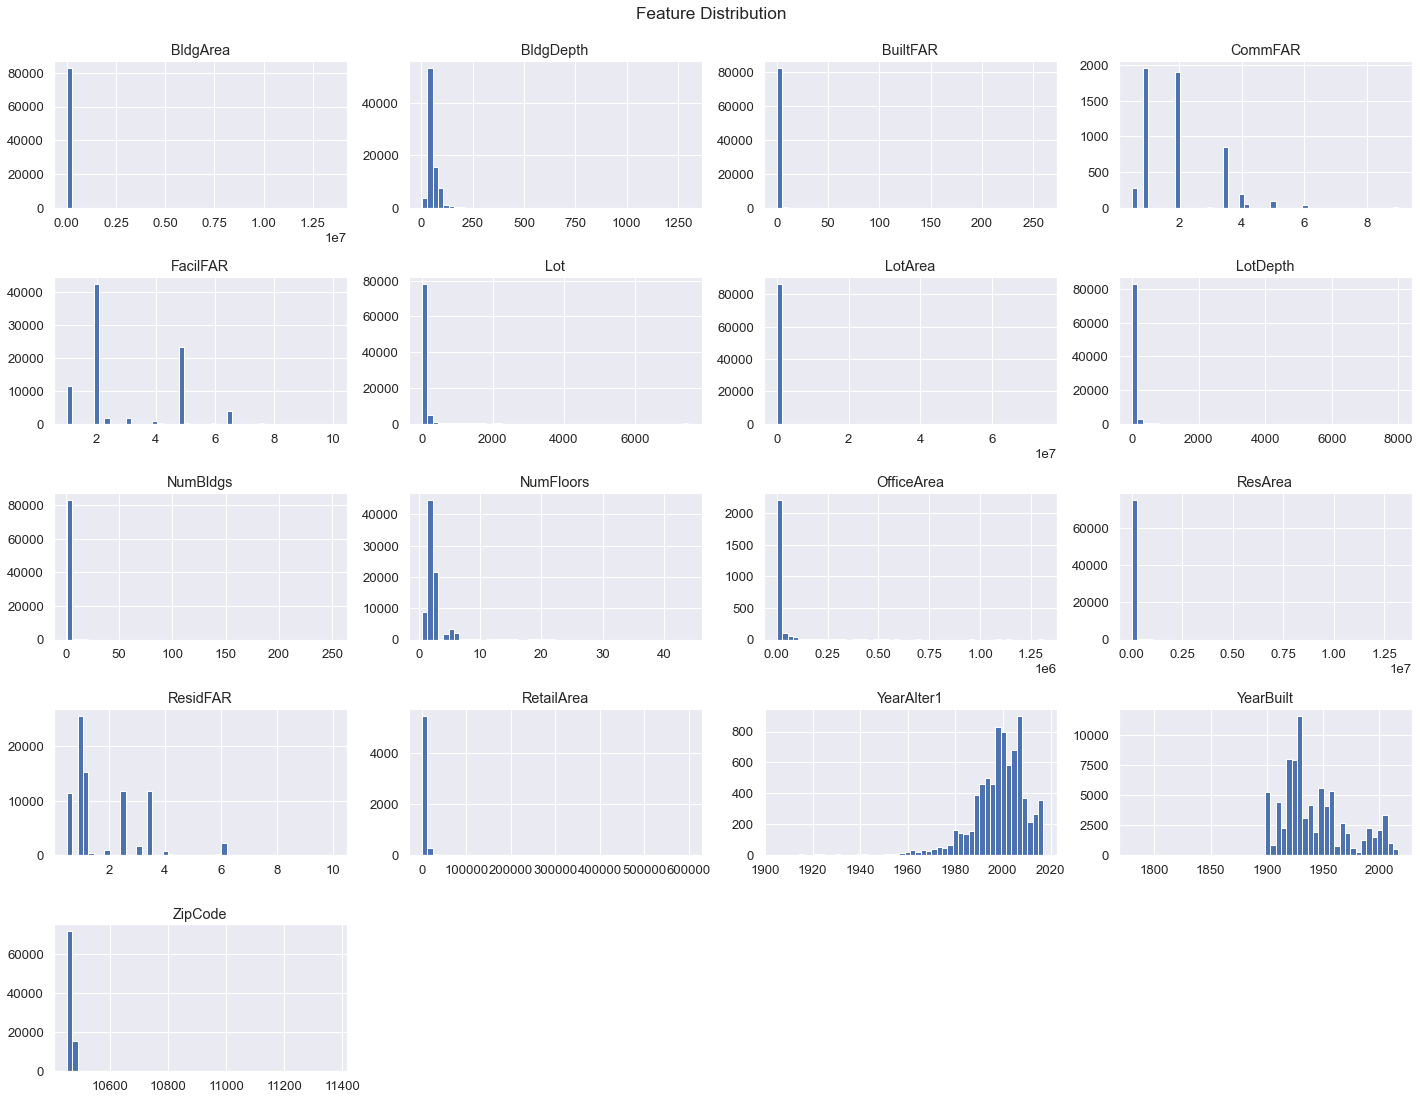

In [83]:
df.hist(bins=50, figsize=(20,15))
plt.suptitle('Feature Distribution', x=0.5, y=1.02, ha='center', fontsize='large')
plt.tight_layout()
plt.show()

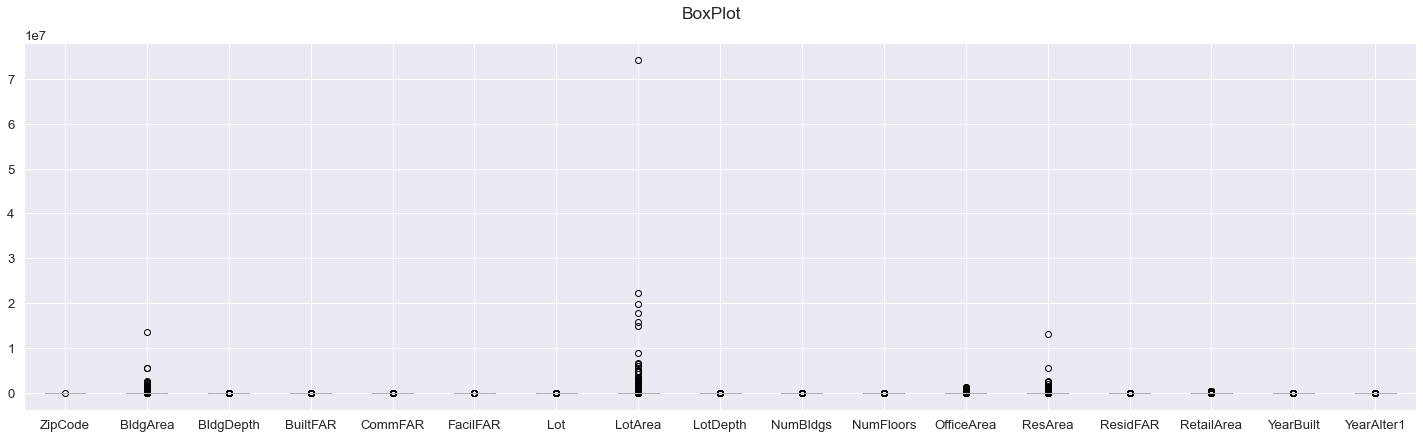

In [84]:
df.boxplot(figsize=(20,6))
plt.suptitle('BoxPlot', x=0.5, y=1.02, ha='center', fontsize='large')
plt.tight_layout()
plt.show()

### Correlation

In [85]:
df.corr()

,ZipCode,BldgArea,BldgDepth,BuiltFAR,CommFAR,FacilFAR,Lot,LotArea,LotDepth,NumBldgs,NumFloors,OfficeArea,ResArea,ResidFAR,RetailArea,YearBuilt,YearAlter1
ZipCode,1.000000,0.092479,-0.174368,-0.157436,-0.145066,-0.457737,0.039569,0.094968,0.025234,0.191065,-0.195793,-0.078526,-0.045439,-0.551268,0.045548,0.065033,0.093055
BldgArea,0.092479,1.000000,0.313605,0.280935,0.052374,0.104912,0.074165,0.172155,0.326751,0.542127,0.377885,0.254932,0.996607,0.108591,0.578487,0.023316,-0.015291
BldgDepth,-0.174368,0.313605,1.000000,0.358928,0.068379,0.372547,0.019053,0.088151,0.418525,0.042092,0.315554,0.435042,0.273834,0.400780,0.444958,-0.018695,-0.164535
BuiltFAR,-0.157436,0.280935,0.358928,1.000000,0.270184,0.275919,0.112946,0.002466,0.001603,0.089361,0.433252,0.035277,0.276817,0.289004,0.451751,-0.007070,-0.194017
CommFAR,-0.145066,0.052374,0.068379,0.270184,1.000000,0.725742,-0.020938,-0.010872,-0.034427,-0.017347,0.193755,0.083459,0.105017,0.720194,0.054842,-0.135181,-0.003301
FacilFAR,-0.457737,0.104912,0.372547,0.275919,0.725742,1.000000,-0.030405,0.018792,0.028574,-0.026852,0.336207,0.083314,0.100672,0.911920,0.065566,-0.048717,-0.177420
Lot,0.039569,0.074165,0.019053,0.112946,-0.020938,-0.030405,1.000000,0.007362,0.052720,0.111472,0.103536,0.045423,0.070343,-0.019644,0.158904,0.085482,0.062795
LotArea,0.094968,0.172155,0.088151,0.002466,-0.010872,0.018792,0.007362,1.000000,0.347033,0.338709,0.031073,0.081769,0.456720,0.017210,0.015796,0.002803,-0.005351
LotDepth,0.025234,0.326751,0.418525,0.001603,-0.034427,0.028574,0.052720,0.347033,1.000000,0.246837,0.163571,0.314086,0.353134,0.024223,0.337338,0.031801,-0.033796
NumBldgs,0.191065,0.542127,0.042092,0.089361,-0.017347,-0.026852,0.111472,0.338709,0.246837,1.000000,0.049753,0.122648,0.512353,-0.036012,0.231309,-0.035348,0.016257


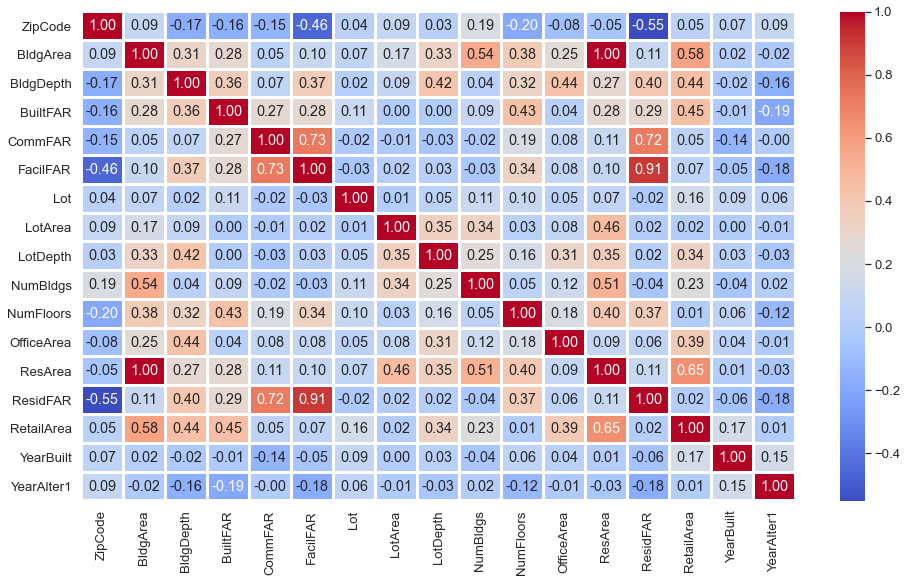

In [86]:
plt.figure(figsize=(16,9))
sns.heatmap(df.corr(),cmap="coolwarm",annot=True,fmt='.2f',linewidths=2)
plt.show()

### Drop columns with large NaNs

In [87]:
df.drop(['CommFAR','OfficeArea','ResArea','RetailArea','YearAlter1','Status'],axis=1,inplace=True)

In [88]:
df

,ZipCode,Address,BldgArea,BldgDepth,BuiltFAR,FacilFAR,Lot,LotArea,LotDepth,NumBldgs,NumFloors,ResidFAR,YearBuilt,Date
0,10454,122 BRUCKNER BOULEVARD,NaN,NaN,NaN,6.5,1,15000.0,200.00,1.0,NaN,6.02,NaN,2017-03-15
1,10454,126 BRUCKNER BOULEVARD,752.0,16.00,0.05,6.5,4,13770.0,100.00,2.0,1.0,6.02,1931.0,2017-03-15
2,10454,138 BRUCKNER BOULEVARD,39375.0,200.00,1.13,6.5,10,35000.0,200.00,1.0,2.0,6.02,1931.0,2017-03-15
3,10454,144 BRUCKNER BOULEVARD,12500.0,85.00,5.00,6.5,17,2500.0,100.00,1.0,5.0,6.02,1931.0,2017-03-15
4,10454,148 BRUCKNER BOULEVARD,8595.0,70.00,4.58,6.5,18,1875.0,75.00,1.0,5.0,6.02,1920.0,2017-03-15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86586,10471,6007 RIVERDALE AVENUE,1044.0,29.00,0.55,2.0,877,1900.0,76.00,1.0,2.0,0.90,1910.0,2018-11-22
86587,10471,6301 RIVERDALE AVENUE,237021.0,35.00,0.13,2.0,1,1845000.0,2000.00,20.0,12.0,0.90,1848.0,2018-11-22
86588,10471,755 WEST 261 STREET,83366.0,121.75,0.32,2.0,10,257775.0,235.25,2.0,3.0,0.90,1956.0,2018-11-22
86589,10471,755 RIVERDALE AVENUE,NaN,NaN,NaN,2.0,43,14749.0,439.17,NaN,NaN,0.90,NaN,2018-11-22


### Drop missing values

In [89]:
df.isnull().sum()

ZipCode         0
Address         0
BldgArea     3495
BldgDepth    3759
BuiltFAR     3576
FacilFAR      771
Lot             0
LotArea        89
LotDepth      126
NumBldgs     3125
NumFloors    3613
ResidFAR     3676
YearBuilt    3466
Date            0
dtype: int64

In [90]:
df.dropna(inplace=True)

In [91]:
df.isnull().sum()

ZipCode      0
Address      0
BldgArea     0
BldgDepth    0
BuiltFAR     0
FacilFAR     0
Lot          0
LotArea      0
LotDepth     0
NumBldgs     0
NumFloors    0
ResidFAR     0
YearBuilt    0
Date         0
dtype: int64

In [92]:
df

,ZipCode,Address,BldgArea,BldgDepth,BuiltFAR,FacilFAR,Lot,LotArea,LotDepth,NumBldgs,NumFloors,ResidFAR,YearBuilt,Date
1,10454,126 BRUCKNER BOULEVARD,752.0,16.00,0.05,6.5,4,13770.0,100.00,2.0,1.0,6.02,1931.0,2017-03-15
2,10454,138 BRUCKNER BOULEVARD,39375.0,200.00,1.13,6.5,10,35000.0,200.00,1.0,2.0,6.02,1931.0,2017-03-15
3,10454,144 BRUCKNER BOULEVARD,12500.0,85.00,5.00,6.5,17,2500.0,100.00,1.0,5.0,6.02,1931.0,2017-03-15
4,10454,148 BRUCKNER BOULEVARD,8595.0,70.00,4.58,6.5,18,1875.0,75.00,1.0,5.0,6.02,1920.0,2017-03-15
6,10454,519 EAST 132 STREET,5316.0,100.00,0.61,6.5,34,8700.0,100.00,2.0,1.0,6.02,1931.0,2017-03-15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86585,10471,6027 RIVERDALE AVENUE,1512.0,28.00,0.39,1.0,414,3891.0,109.08,2.0,2.0,0.50,1940.0,2018-11-22
86586,10471,6007 RIVERDALE AVENUE,1044.0,29.00,0.55,2.0,877,1900.0,76.00,1.0,2.0,0.90,1910.0,2018-11-22
86587,10471,6301 RIVERDALE AVENUE,237021.0,35.00,0.13,2.0,1,1845000.0,2000.00,20.0,12.0,0.90,1848.0,2018-11-22
86588,10471,755 WEST 261 STREET,83366.0,121.75,0.32,2.0,10,257775.0,235.25,2.0,3.0,0.90,1956.0,2018-11-22


### Treat Duplicate Values

In [93]:
df.duplicated(keep='first').sum()

0

In [94]:
df[df.duplicated(keep=False)]

,ZipCode,Address,BldgArea,BldgDepth,BuiltFAR,FacilFAR,Lot,LotArea,LotDepth,NumBldgs,NumFloors,ResidFAR,YearBuilt,Date


In [95]:
df.drop_duplicates(ignore_index=True, inplace=True)

In [96]:
df

,ZipCode,Address,BldgArea,BldgDepth,BuiltFAR,FacilFAR,Lot,LotArea,LotDepth,NumBldgs,NumFloors,ResidFAR,YearBuilt,Date
0,10454,126 BRUCKNER BOULEVARD,752.0,16.00,0.05,6.5,4,13770.0,100.00,2.0,1.0,6.02,1931.0,2017-03-15
1,10454,138 BRUCKNER BOULEVARD,39375.0,200.00,1.13,6.5,10,35000.0,200.00,1.0,2.0,6.02,1931.0,2017-03-15
2,10454,144 BRUCKNER BOULEVARD,12500.0,85.00,5.00,6.5,17,2500.0,100.00,1.0,5.0,6.02,1931.0,2017-03-15
3,10454,148 BRUCKNER BOULEVARD,8595.0,70.00,4.58,6.5,18,1875.0,75.00,1.0,5.0,6.02,1920.0,2017-03-15
4,10454,519 EAST 132 STREET,5316.0,100.00,0.61,6.5,34,8700.0,100.00,2.0,1.0,6.02,1931.0,2017-03-15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79631,10471,6027 RIVERDALE AVENUE,1512.0,28.00,0.39,1.0,414,3891.0,109.08,2.0,2.0,0.50,1940.0,2018-11-22
79632,10471,6007 RIVERDALE AVENUE,1044.0,29.00,0.55,2.0,877,1900.0,76.00,1.0,2.0,0.90,1910.0,2018-11-22
79633,10471,6301 RIVERDALE AVENUE,237021.0,35.00,0.13,2.0,1,1845000.0,2000.00,20.0,12.0,0.90,1848.0,2018-11-22
79634,10471,755 WEST 261 STREET,83366.0,121.75,0.32,2.0,10,257775.0,235.25,2.0,3.0,0.90,1956.0,2018-11-22


In [97]:
df1 = df.sort_values(by='Date',ascending=True)

In [98]:
df1

,ZipCode,Address,BldgArea,BldgDepth,BuiltFAR,FacilFAR,Lot,LotArea,LotDepth,NumBldgs,NumFloors,ResidFAR,YearBuilt,Date
5380,10455,627 TINTON AVENUE,3348.0,52.6,1.57,4.8,180,2133.0,100.00,1.0,3.0,3.44,2004.0,2012-10-11
1643,10455,402 EAST 152 STREET,8080.0,105.0,2.82,6.5,35,2861.0,114.25,1.0,3.0,3.44,1931.0,2012-10-11
1642,10455,624 MELROSE AVENUE,2280.0,114.0,1.00,6.5,34,2289.0,114.49,1.0,1.0,3.44,1931.0,2012-10-11
1641,10455,614 MELROSE AVENUE,10868.0,95.0,1.00,6.5,26,10868.0,95.00,1.0,1.0,3.44,1963.0,2012-10-11
1640,10455,2889 3 AVENUE,20200.0,136.0,2.69,6.5,21,7513.0,145.98,1.0,3.0,3.44,1931.0,2012-10-11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2139,10451,364 EAST 160 STREET,3528.0,49.0,1.47,6.5,109,2400.0,100.00,1.0,3.0,3.44,2005.0,2019-05-03
2138,10451,838 COURTLANDT AVENUE,3174.0,46.0,1.10,6.5,108,2883.0,93.00,1.0,3.0,3.44,2005.0,2019-05-03
2137,10451,836 COURTLANDT AVENUE,3174.0,46.0,1.48,6.5,107,2139.0,93.00,1.0,3.0,3.44,2005.0,2019-05-03
1871,10451,461 EAST 159 STREET,1716.0,50.0,1.02,6.5,65,1683.0,101.00,1.0,2.0,3.44,1901.0,2019-05-03


In [99]:
df1.reset_index(drop=True)

,ZipCode,Address,BldgArea,BldgDepth,BuiltFAR,FacilFAR,Lot,LotArea,LotDepth,NumBldgs,NumFloors,ResidFAR,YearBuilt,Date
0,10455,627 TINTON AVENUE,3348.0,52.6,1.57,4.8,180,2133.0,100.00,1.0,3.0,3.44,2004.0,2012-10-11
1,10455,402 EAST 152 STREET,8080.0,105.0,2.82,6.5,35,2861.0,114.25,1.0,3.0,3.44,1931.0,2012-10-11
2,10455,624 MELROSE AVENUE,2280.0,114.0,1.00,6.5,34,2289.0,114.49,1.0,1.0,3.44,1931.0,2012-10-11
3,10455,614 MELROSE AVENUE,10868.0,95.0,1.00,6.5,26,10868.0,95.00,1.0,1.0,3.44,1963.0,2012-10-11
4,10455,2889 3 AVENUE,20200.0,136.0,2.69,6.5,21,7513.0,145.98,1.0,3.0,3.44,1931.0,2012-10-11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79631,10451,364 EAST 160 STREET,3528.0,49.0,1.47,6.5,109,2400.0,100.00,1.0,3.0,3.44,2005.0,2019-05-03
79632,10451,838 COURTLANDT AVENUE,3174.0,46.0,1.10,6.5,108,2883.0,93.00,1.0,3.0,3.44,2005.0,2019-05-03
79633,10451,836 COURTLANDT AVENUE,3174.0,46.0,1.48,6.5,107,2139.0,93.00,1.0,3.0,3.44,2005.0,2019-05-03
79634,10451,461 EAST 159 STREET,1716.0,50.0,1.02,6.5,65,1683.0,101.00,1.0,2.0,3.44,1901.0,2019-05-03


In [100]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 79636 entries, 5380 to 2293
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   ZipCode    79636 non-null  int64         
 1   Address    79636 non-null  object        
 2   BldgArea   79636 non-null  float64       
 3   BldgDepth  79636 non-null  float64       
 4   BuiltFAR   79636 non-null  float64       
 5   FacilFAR   79636 non-null  float64       
 6   Lot        79636 non-null  int64         
 7   LotArea    79636 non-null  float64       
 8   LotDepth   79636 non-null  float64       
 9   NumBldgs   79636 non-null  float64       
 10  NumFloors  79636 non-null  float64       
 11  ResidFAR   79636 non-null  float64       
 12  YearBuilt  79636 non-null  float64       
 13  Date       79636 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(10), int64(2), object(1)
memory usage: 9.1+ MB


In [101]:
df1["Age"] = 2020.0 - df1["YearBuilt"]

In [102]:
df1

,ZipCode,Address,BldgArea,BldgDepth,BuiltFAR,FacilFAR,Lot,LotArea,LotDepth,NumBldgs,NumFloors,ResidFAR,YearBuilt,Date,Age
5380,10455,627 TINTON AVENUE,3348.0,52.6,1.57,4.8,180,2133.0,100.00,1.0,3.0,3.44,2004.0,2012-10-11,16.0
1643,10455,402 EAST 152 STREET,8080.0,105.0,2.82,6.5,35,2861.0,114.25,1.0,3.0,3.44,1931.0,2012-10-11,89.0
1642,10455,624 MELROSE AVENUE,2280.0,114.0,1.00,6.5,34,2289.0,114.49,1.0,1.0,3.44,1931.0,2012-10-11,89.0
1641,10455,614 MELROSE AVENUE,10868.0,95.0,1.00,6.5,26,10868.0,95.00,1.0,1.0,3.44,1963.0,2012-10-11,57.0
1640,10455,2889 3 AVENUE,20200.0,136.0,2.69,6.5,21,7513.0,145.98,1.0,3.0,3.44,1931.0,2012-10-11,89.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2139,10451,364 EAST 160 STREET,3528.0,49.0,1.47,6.5,109,2400.0,100.00,1.0,3.0,3.44,2005.0,2019-05-03,15.0
2138,10451,838 COURTLANDT AVENUE,3174.0,46.0,1.10,6.5,108,2883.0,93.00,1.0,3.0,3.44,2005.0,2019-05-03,15.0
2137,10451,836 COURTLANDT AVENUE,3174.0,46.0,1.48,6.5,107,2139.0,93.00,1.0,3.0,3.44,2005.0,2019-05-03,15.0
1871,10451,461 EAST 159 STREET,1716.0,50.0,1.02,6.5,65,1683.0,101.00,1.0,2.0,3.44,1901.0,2019-05-03,119.0


In [103]:
df2 = df1.copy()

In [104]:
df2.columns

Index(['ZipCode', 'Address', 'BldgArea', 'BldgDepth', 'BuiltFAR', 'FacilFAR',
       'Lot', 'LotArea', 'LotDepth', 'NumBldgs', 'NumFloors', 'ResidFAR',
       'YearBuilt', 'Date', 'Age'],
      dtype='object')

In [105]:
df2 = df2[['Address','Date', 'Age', 'YearBuilt', 'ZipCode','BldgArea', 'BldgDepth', 'BuiltFAR', 'FacilFAR', 'Lot',
       'LotArea', 'LotDepth', 'NumBldgs', 'NumFloors', 'ResidFAR' ]]

In [106]:
df2

,Address,Date,Age,YearBuilt,ZipCode,BldgArea,BldgDepth,BuiltFAR,FacilFAR,Lot,LotArea,LotDepth,NumBldgs,NumFloors,ResidFAR
5380,627 TINTON AVENUE,2012-10-11,16.0,2004.0,10455,3348.0,52.6,1.57,4.8,180,2133.0,100.00,1.0,3.0,3.44
1643,402 EAST 152 STREET,2012-10-11,89.0,1931.0,10455,8080.0,105.0,2.82,6.5,35,2861.0,114.25,1.0,3.0,3.44
1642,624 MELROSE AVENUE,2012-10-11,89.0,1931.0,10455,2280.0,114.0,1.00,6.5,34,2289.0,114.49,1.0,1.0,3.44
1641,614 MELROSE AVENUE,2012-10-11,57.0,1963.0,10455,10868.0,95.0,1.00,6.5,26,10868.0,95.00,1.0,1.0,3.44
1640,2889 3 AVENUE,2012-10-11,89.0,1931.0,10455,20200.0,136.0,2.69,6.5,21,7513.0,145.98,1.0,3.0,3.44
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2139,364 EAST 160 STREET,2019-05-03,15.0,2005.0,10451,3528.0,49.0,1.47,6.5,109,2400.0,100.00,1.0,3.0,3.44
2138,838 COURTLANDT AVENUE,2019-05-03,15.0,2005.0,10451,3174.0,46.0,1.10,6.5,108,2883.0,93.00,1.0,3.0,3.44
2137,836 COURTLANDT AVENUE,2019-05-03,15.0,2005.0,10451,3174.0,46.0,1.48,6.5,107,2139.0,93.00,1.0,3.0,3.44
1871,461 EAST 159 STREET,2019-05-03,119.0,1901.0,10451,1716.0,50.0,1.02,6.5,65,1683.0,101.00,1.0,2.0,3.44


In [107]:
df2.reset_index(drop=True, inplace=True)

In [108]:
df2.drop(['YearBuilt'],axis=1,inplace=True)

In [109]:
df2

,Address,Date,Age,ZipCode,BldgArea,BldgDepth,BuiltFAR,FacilFAR,Lot,LotArea,LotDepth,NumBldgs,NumFloors,ResidFAR
0,627 TINTON AVENUE,2012-10-11,16.0,10455,3348.0,52.6,1.57,4.8,180,2133.0,100.00,1.0,3.0,3.44
1,402 EAST 152 STREET,2012-10-11,89.0,10455,8080.0,105.0,2.82,6.5,35,2861.0,114.25,1.0,3.0,3.44
2,624 MELROSE AVENUE,2012-10-11,89.0,10455,2280.0,114.0,1.00,6.5,34,2289.0,114.49,1.0,1.0,3.44
3,614 MELROSE AVENUE,2012-10-11,57.0,10455,10868.0,95.0,1.00,6.5,26,10868.0,95.00,1.0,1.0,3.44
4,2889 3 AVENUE,2012-10-11,89.0,10455,20200.0,136.0,2.69,6.5,21,7513.0,145.98,1.0,3.0,3.44
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79631,364 EAST 160 STREET,2019-05-03,15.0,10451,3528.0,49.0,1.47,6.5,109,2400.0,100.00,1.0,3.0,3.44
79632,838 COURTLANDT AVENUE,2019-05-03,15.0,10451,3174.0,46.0,1.10,6.5,108,2883.0,93.00,1.0,3.0,3.44
79633,836 COURTLANDT AVENUE,2019-05-03,15.0,10451,3174.0,46.0,1.48,6.5,107,2139.0,93.00,1.0,3.0,3.44
79634,461 EAST 159 STREET,2019-05-03,119.0,10451,1716.0,50.0,1.02,6.5,65,1683.0,101.00,1.0,2.0,3.44


In [110]:
#df2.to_csv("merged3.csv",index=False)

### Load the merged3 dataset 

In [111]:
df = pd.read_csv("merged3.csv")

In [112]:
df

,Address,Date,Age,ZipCode,BldgArea,BldgDepth,BuiltFAR,FacilFAR,Lot,LotArea,LotDepth,NumBldgs,NumFloors,ResidFAR
0,627 TINTON AVENUE,2012-10-11,16.0,10455,3348.0,52.6,1.57,4.8,180,2133.0,100.00,1.0,3.0,3.44
1,402 EAST 152 STREET,2012-10-11,89.0,10455,8080.0,105.0,2.82,6.5,35,2861.0,114.25,1.0,3.0,3.44
2,624 MELROSE AVENUE,2012-10-11,89.0,10455,2280.0,114.0,1.00,6.5,34,2289.0,114.49,1.0,1.0,3.44
3,614 MELROSE AVENUE,2012-10-11,57.0,10455,10868.0,95.0,1.00,6.5,26,10868.0,95.00,1.0,1.0,3.44
4,2889 3 AVENUE,2012-10-11,89.0,10455,20200.0,136.0,2.69,6.5,21,7513.0,145.98,1.0,3.0,3.44
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79631,364 EAST 160 STREET,2019-05-03,15.0,10451,3528.0,49.0,1.47,6.5,109,2400.0,100.00,1.0,3.0,3.44
79632,838 COURTLANDT AVENUE,2019-05-03,15.0,10451,3174.0,46.0,1.10,6.5,108,2883.0,93.00,1.0,3.0,3.44
79633,836 COURTLANDT AVENUE,2019-05-03,15.0,10451,3174.0,46.0,1.48,6.5,107,2139.0,93.00,1.0,3.0,3.44
79634,461 EAST 159 STREET,2019-05-03,119.0,10451,1716.0,50.0,1.02,6.5,65,1683.0,101.00,1.0,2.0,3.44


In [113]:
df.groupby(by="Address").count()

,Date,Age,ZipCode,BldgArea,BldgDepth,BuiltFAR,FacilFAR,Lot,LotArea,LotDepth,NumBldgs,NumFloors,ResidFAR
Address,,,,,,,,,,,,,
1 ALDEN PARK,2,2,2,2,2,2,2,2,2,2,2,2,2
1 ANGELAS PLACE,1,1,1,1,1,1,1,1,1,1,1,1,1
1 BANES COURT,1,1,1,1,1,1,1,1,1,1,1,1,1
1 BEDFORD PARK BLVD,1,1,1,1,1,1,1,1,1,1,1,1,1
1 BLACKSTONE PLACE,1,1,1,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
MATILDA AVENUE,1,1,1,1,1,1,1,1,1,1,1,1,1
ODELL STREET,1,1,1,1,1,1,1,1,1,1,1,1,1
SEDGWICK AVENUE,1,1,1,1,1,1,1,1,1,1,1,1,1


In [114]:
df.groupby(by="Date").count()

,Address,Age,ZipCode,BldgArea,BldgDepth,BuiltFAR,FacilFAR,Lot,LotArea,LotDepth,NumBldgs,NumFloors,ResidFAR
Date,,,,,,,,,,,,,
2012-10-11,1465,1465,1465,1465,1465,1465,1465,1465,1465,1465,1465,1465,1465
2012-11-22,7602,7602,7602,7602,7602,7602,7602,7602,7602,7602,7602,7602,7602
2012-12-14,2345,2345,2345,2345,2345,2345,2345,2345,2345,2345,2345,2345,2345
2013-01-24,2555,2555,2555,2555,2555,2555,2555,2555,2555,2555,2555,2555,2555
2013-01-25,2454,2454,2454,2454,2454,2454,2454,2454,2454,2454,2454,2454,2454
2013-02-21,480,480,480,480,480,480,480,480,480,480,480,480,480
2013-10-29,2124,2124,2124,2124,2124,2124,2124,2124,2124,2124,2124,2124,2124
2013-12-27,1248,1248,1248,1248,1248,1248,1248,1248,1248,1248,1248,1248,1248
2014-02-18,1950,1950,1950,1950,1950,1950,1950,1950,1950,1950,1950,1950,1950


In [115]:
df.groupby(by='NumBldgs').count()

,Address,Date,Age,ZipCode,BldgArea,BldgDepth,BuiltFAR,FacilFAR,Lot,LotArea,LotDepth,NumFloors,ResidFAR
NumBldgs,,,,,,,,,,,,,
1.0,63704,63704,63704,63704,63704,63704,63704,63704,63704,63704,63704,63704,63704
2.0,14821,14821,14821,14821,14821,14821,14821,14821,14821,14821,14821,14821,14821
3.0,767,767,767,767,767,767,767,767,767,767,767,767,767
4.0,150,150,150,150,150,150,150,150,150,150,150,150,150
5.0,54,54,54,54,54,54,54,54,54,54,54,54,54
6.0,28,28,28,28,28,28,28,28,28,28,28,28,28
7.0,20,20,20,20,20,20,20,20,20,20,20,20,20
8.0,11,11,11,11,11,11,11,11,11,11,11,11,11
9.0,11,11,11,11,11,11,11,11,11,11,11,11,11


In [116]:
df.groupby(by='Age').count()

,Address,Date,ZipCode,BldgArea,BldgDepth,BuiltFAR,FacilFAR,Lot,LotArea,LotDepth,NumBldgs,NumFloors,ResidFAR
Age,,,,,,,,,,,,,
3.0,12,12,12,12,12,12,12,12,12,12,12,12,12
4.0,53,53,53,53,53,53,53,53,53,53,53,53,53
5.0,92,92,92,92,92,92,92,92,92,92,92,92,92
6.0,111,111,111,111,111,111,111,111,111,111,111,111,111
7.0,94,94,94,94,94,94,94,94,94,94,94,94,94
...,...,...,...,...,...,...,...,...,...,...,...,...,...
167.0,1,1,1,1,1,1,1,1,1,1,1,1,1
170.0,1,1,1,1,1,1,1,1,1,1,1,1,1
171.0,1,1,1,1,1,1,1,1,1,1,1,1,1


In [138]:
df.groupby(by="Lot").count()

,Address,Age,BldgArea,BldgDepth,BuiltFAR,FacilFAR,LotArea,LotDepth,NumBldgs,NumFloors,ResidFAR
Lot,,,,,,,,,,,
1,1974,1974,1974,1974,1974,1974,1974,1974,1974,1974,1974
2,613,613,613,613,613,613,613,613,613,613,613
3,861,861,861,861,861,861,861,861,861,861,861
4,797,797,797,797,797,797,797,797,797,797,797
5,1028,1028,1028,1028,1028,1028,1028,1028,1028,1028,1028
...,...,...,...,...,...,...,...,...,...,...,...
7501,103,103,103,103,103,103,103,103,103,103,103
7502,11,11,11,11,11,11,11,11,11,11,11
7503,4,4,4,4,4,4,4,4,4,4,4


### We will reshape the dataset to include Count column

In [117]:
addresslevel = pd.DataFrame(df.groupby(by="Address")['Date'].count())

In [118]:
addresslevel

,Date
Address,
1 ALDEN PARK,2
1 ANGELAS PLACE,1
1 BANES COURT,1
1 BEDFORD PARK BLVD,1
1 BLACKSTONE PLACE,1
...,...
MATILDA AVENUE,1
ODELL STREET,1
SEDGWICK AVENUE,1


In [119]:
addresslevel.reset_index(drop=False, inplace=True)

In [120]:
addresslevel

,Address,Date
0,1 ALDEN PARK,2
1,1 ANGELAS PLACE,1
2,1 BANES COURT,1
3,1 BEDFORD PARK BLVD,1
4,1 BLACKSTONE PLACE,1
...,...,...
79574,MATILDA AVENUE,1
79575,ODELL STREET,1
79576,SEDGWICK AVENUE,1
79577,SILVER BEACH,1


In [121]:
df

,Address,Date,Age,ZipCode,BldgArea,BldgDepth,BuiltFAR,FacilFAR,Lot,LotArea,LotDepth,NumBldgs,NumFloors,ResidFAR
0,627 TINTON AVENUE,2012-10-11,16.0,10455,3348.0,52.6,1.57,4.8,180,2133.0,100.00,1.0,3.0,3.44
1,402 EAST 152 STREET,2012-10-11,89.0,10455,8080.0,105.0,2.82,6.5,35,2861.0,114.25,1.0,3.0,3.44
2,624 MELROSE AVENUE,2012-10-11,89.0,10455,2280.0,114.0,1.00,6.5,34,2289.0,114.49,1.0,1.0,3.44
3,614 MELROSE AVENUE,2012-10-11,57.0,10455,10868.0,95.0,1.00,6.5,26,10868.0,95.00,1.0,1.0,3.44
4,2889 3 AVENUE,2012-10-11,89.0,10455,20200.0,136.0,2.69,6.5,21,7513.0,145.98,1.0,3.0,3.44
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79631,364 EAST 160 STREET,2019-05-03,15.0,10451,3528.0,49.0,1.47,6.5,109,2400.0,100.00,1.0,3.0,3.44
79632,838 COURTLANDT AVENUE,2019-05-03,15.0,10451,3174.0,46.0,1.10,6.5,108,2883.0,93.00,1.0,3.0,3.44
79633,836 COURTLANDT AVENUE,2019-05-03,15.0,10451,3174.0,46.0,1.48,6.5,107,2139.0,93.00,1.0,3.0,3.44
79634,461 EAST 159 STREET,2019-05-03,119.0,10451,1716.0,50.0,1.02,6.5,65,1683.0,101.00,1.0,2.0,3.44


In [122]:
df.columns

Index(['Address', 'Date', 'Age', 'ZipCode', 'BldgArea', 'BldgDepth',
       'BuiltFAR', 'FacilFAR', 'Lot', 'LotArea', 'LotDepth', 'NumBldgs',
       'NumFloors', 'ResidFAR'],
      dtype='object')

In [123]:
df.drop(['Date','ZipCode'],axis=1,inplace=True)

In [124]:
df

,Address,Age,BldgArea,BldgDepth,BuiltFAR,FacilFAR,Lot,LotArea,LotDepth,NumBldgs,NumFloors,ResidFAR
0,627 TINTON AVENUE,16.0,3348.0,52.6,1.57,4.8,180,2133.0,100.00,1.0,3.0,3.44
1,402 EAST 152 STREET,89.0,8080.0,105.0,2.82,6.5,35,2861.0,114.25,1.0,3.0,3.44
2,624 MELROSE AVENUE,89.0,2280.0,114.0,1.00,6.5,34,2289.0,114.49,1.0,1.0,3.44
3,614 MELROSE AVENUE,57.0,10868.0,95.0,1.00,6.5,26,10868.0,95.00,1.0,1.0,3.44
4,2889 3 AVENUE,89.0,20200.0,136.0,2.69,6.5,21,7513.0,145.98,1.0,3.0,3.44
...,...,...,...,...,...,...,...,...,...,...,...,...
79631,364 EAST 160 STREET,15.0,3528.0,49.0,1.47,6.5,109,2400.0,100.00,1.0,3.0,3.44
79632,838 COURTLANDT AVENUE,15.0,3174.0,46.0,1.10,6.5,108,2883.0,93.00,1.0,3.0,3.44
79633,836 COURTLANDT AVENUE,15.0,3174.0,46.0,1.48,6.5,107,2139.0,93.00,1.0,3.0,3.44
79634,461 EAST 159 STREET,119.0,1716.0,50.0,1.02,6.5,65,1683.0,101.00,1.0,2.0,3.44


In [125]:
df4 = pd.concat([addresslevel,df],axis=1,join='inner')

In [126]:
df4

,Address,Date,Address,Age,BldgArea,BldgDepth,BuiltFAR,FacilFAR,Lot,LotArea,LotDepth,NumBldgs,NumFloors,ResidFAR
0,1 ALDEN PARK,2,627 TINTON AVENUE,16.0,3348.0,52.6,1.57,4.8,180,2133.0,100.00,1.0,3.0,3.44
1,1 ANGELAS PLACE,1,402 EAST 152 STREET,89.0,8080.0,105.0,2.82,6.5,35,2861.0,114.25,1.0,3.0,3.44
2,1 BANES COURT,1,624 MELROSE AVENUE,89.0,2280.0,114.0,1.00,6.5,34,2289.0,114.49,1.0,1.0,3.44
3,1 BEDFORD PARK BLVD,1,614 MELROSE AVENUE,57.0,10868.0,95.0,1.00,6.5,26,10868.0,95.00,1.0,1.0,3.44
4,1 BLACKSTONE PLACE,1,2889 3 AVENUE,89.0,20200.0,136.0,2.69,6.5,21,7513.0,145.98,1.0,3.0,3.44
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79574,MATILDA AVENUE,1,321 EAST 150 STREET,95.0,6280.0,65.0,2.12,4.8,60,2960.0,118.33,1.0,4.0,2.43
79575,ODELL STREET,1,323 EAST 150 STREET,121.0,2952.0,30.0,1.00,4.8,59,2958.0,118.33,1.0,2.0,2.43
79576,SEDGWICK AVENUE,1,327 EAST 150 STREET,121.0,1750.0,35.0,0.59,4.8,58,2958.0,118.33,1.0,2.0,2.43
79577,SILVER BEACH,1,297 EAST 150 STREET,121.0,2280.0,30.0,0.77,4.8,71,2960.0,118.40,2.0,2.0,2.43


In [127]:
df4.columns

Index(['Address', 'Date', 'Address', 'Age', 'BldgArea', 'BldgDepth',
       'BuiltFAR', 'FacilFAR', 'Lot', 'LotArea', 'LotDepth', 'NumBldgs',
       'NumFloors', 'ResidFAR'],
      dtype='object')

In [128]:
df4.drop(['Address','Address'],axis=1,inplace=True)

In [129]:
df4

,Date,Age,BldgArea,BldgDepth,BuiltFAR,FacilFAR,Lot,LotArea,LotDepth,NumBldgs,NumFloors,ResidFAR
0,2,16.0,3348.0,52.6,1.57,4.8,180,2133.0,100.00,1.0,3.0,3.44
1,1,89.0,8080.0,105.0,2.82,6.5,35,2861.0,114.25,1.0,3.0,3.44
2,1,89.0,2280.0,114.0,1.00,6.5,34,2289.0,114.49,1.0,1.0,3.44
3,1,57.0,10868.0,95.0,1.00,6.5,26,10868.0,95.00,1.0,1.0,3.44
4,1,89.0,20200.0,136.0,2.69,6.5,21,7513.0,145.98,1.0,3.0,3.44
...,...,...,...,...,...,...,...,...,...,...,...,...
79574,1,95.0,6280.0,65.0,2.12,4.8,60,2960.0,118.33,1.0,4.0,2.43
79575,1,121.0,2952.0,30.0,1.00,4.8,59,2958.0,118.33,1.0,2.0,2.43
79576,1,121.0,1750.0,35.0,0.59,4.8,58,2958.0,118.33,1.0,2.0,2.43
79577,1,121.0,2280.0,30.0,0.77,4.8,71,2960.0,118.40,2.0,2.0,2.43


In [130]:
df4.rename(columns={'Date':'Count'},inplace=True)

In [131]:
df4

,Count,Age,BldgArea,BldgDepth,BuiltFAR,FacilFAR,Lot,LotArea,LotDepth,NumBldgs,NumFloors,ResidFAR
0,2,16.0,3348.0,52.6,1.57,4.8,180,2133.0,100.00,1.0,3.0,3.44
1,1,89.0,8080.0,105.0,2.82,6.5,35,2861.0,114.25,1.0,3.0,3.44
2,1,89.0,2280.0,114.0,1.00,6.5,34,2289.0,114.49,1.0,1.0,3.44
3,1,57.0,10868.0,95.0,1.00,6.5,26,10868.0,95.00,1.0,1.0,3.44
4,1,89.0,20200.0,136.0,2.69,6.5,21,7513.0,145.98,1.0,3.0,3.44
...,...,...,...,...,...,...,...,...,...,...,...,...
79574,1,95.0,6280.0,65.0,2.12,4.8,60,2960.0,118.33,1.0,4.0,2.43
79575,1,121.0,2952.0,30.0,1.00,4.8,59,2958.0,118.33,1.0,2.0,2.43
79576,1,121.0,1750.0,35.0,0.59,4.8,58,2958.0,118.33,1.0,2.0,2.43
79577,1,121.0,2280.0,30.0,0.77,4.8,71,2960.0,118.40,2.0,2.0,2.43


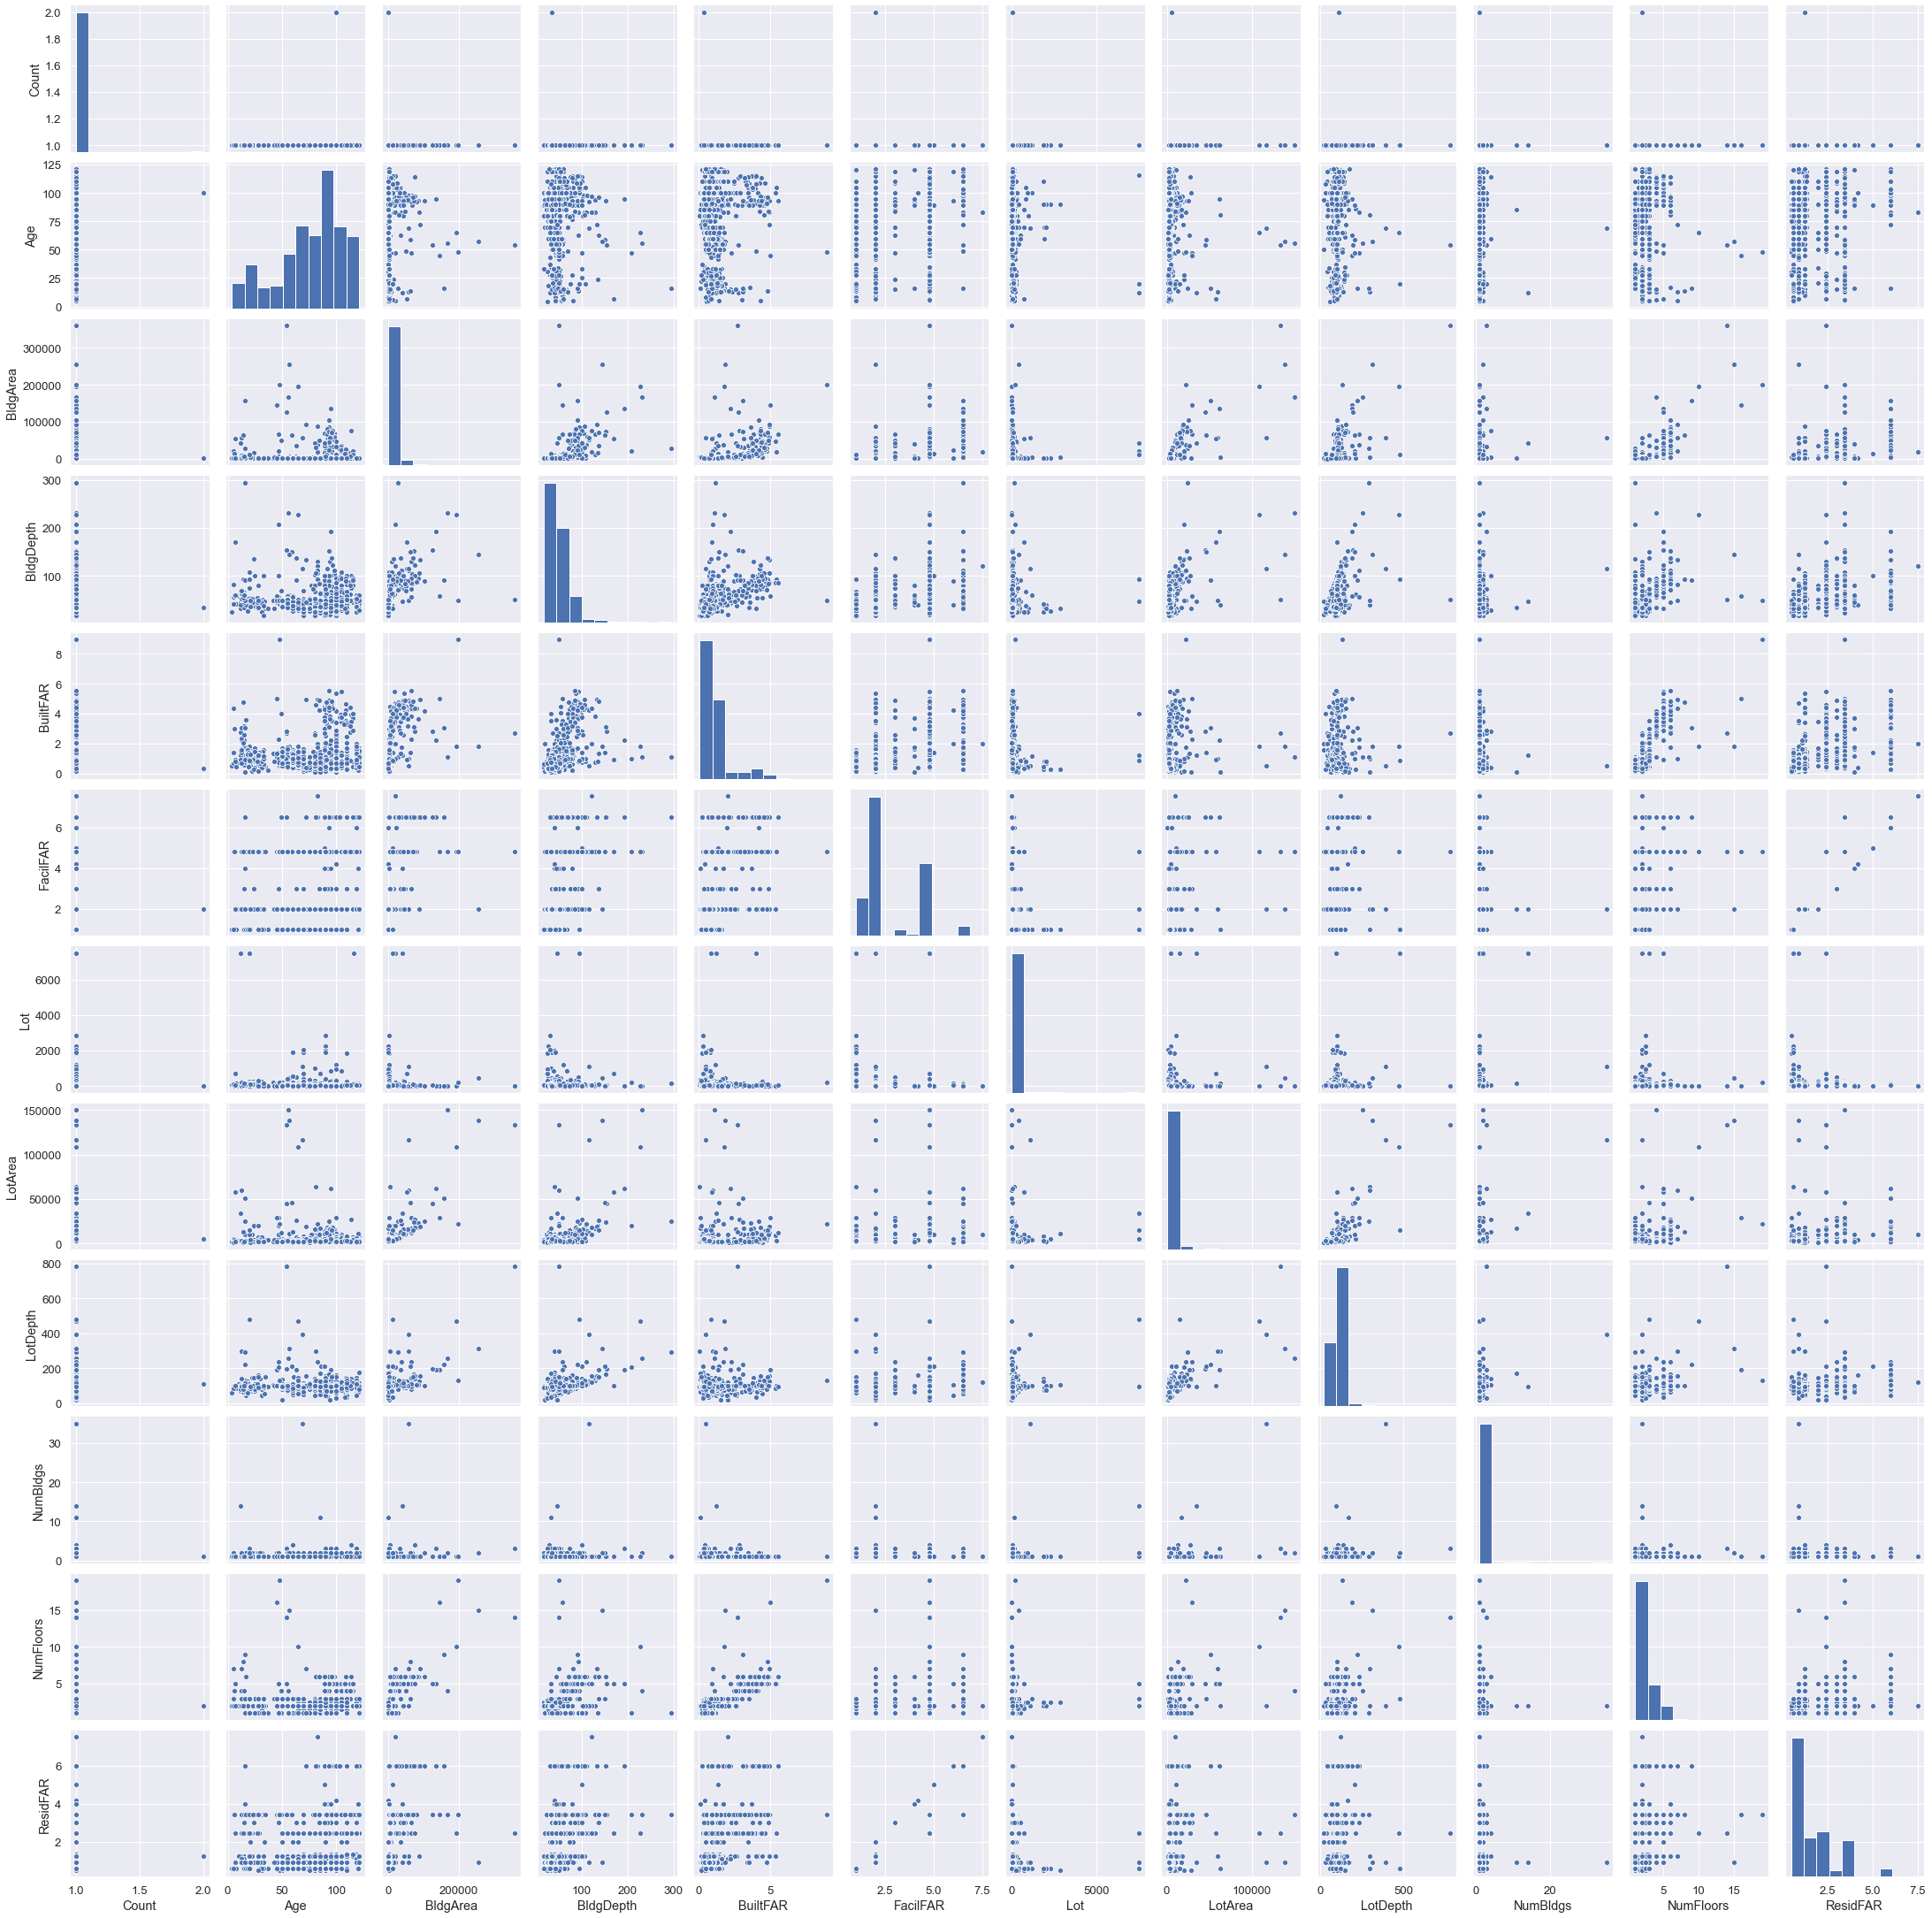

In [132]:
sns.pairplot(df4.sample(1000))
plt.show()

In [133]:
df4.columns

Index(['Count', 'Age', 'BldgArea', 'BldgDepth', 'BuiltFAR', 'FacilFAR', 'Lot',
       'LotArea', 'LotDepth', 'NumBldgs', 'NumFloors', 'ResidFAR'],
      dtype='object')

In [134]:
df5 = df4[['Age', 'BldgArea', 'BldgDepth', 'BuiltFAR', 'FacilFAR', 'Lot',
       'LotArea', 'LotDepth', 'NumBldgs', 'NumFloors', 'ResidFAR','Count']]

In [135]:
df5

,Age,BldgArea,BldgDepth,BuiltFAR,FacilFAR,Lot,LotArea,LotDepth,NumBldgs,NumFloors,ResidFAR,Count
0,16.0,3348.0,52.6,1.57,4.8,180,2133.0,100.00,1.0,3.0,3.44,2
1,89.0,8080.0,105.0,2.82,6.5,35,2861.0,114.25,1.0,3.0,3.44,1
2,89.0,2280.0,114.0,1.00,6.5,34,2289.0,114.49,1.0,1.0,3.44,1
3,57.0,10868.0,95.0,1.00,6.5,26,10868.0,95.00,1.0,1.0,3.44,1
4,89.0,20200.0,136.0,2.69,6.5,21,7513.0,145.98,1.0,3.0,3.44,1
...,...,...,...,...,...,...,...,...,...,...,...,...
79574,95.0,6280.0,65.0,2.12,4.8,60,2960.0,118.33,1.0,4.0,2.43,1
79575,121.0,2952.0,30.0,1.00,4.8,59,2958.0,118.33,1.0,2.0,2.43,1
79576,121.0,1750.0,35.0,0.59,4.8,58,2958.0,118.33,1.0,2.0,2.43,1
79577,121.0,2280.0,30.0,0.77,4.8,71,2960.0,118.40,2.0,2.0,2.43,1


In [136]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79579 entries, 0 to 79578
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Age        79579 non-null  float64
 1   BldgArea   79579 non-null  float64
 2   BldgDepth  79579 non-null  float64
 3   BuiltFAR   79579 non-null  float64
 4   FacilFAR   79579 non-null  float64
 5   Lot        79579 non-null  int64  
 6   LotArea    79579 non-null  float64
 7   LotDepth   79579 non-null  float64
 8   NumBldgs   79579 non-null  float64
 9   NumFloors  79579 non-null  float64
 10  ResidFAR   79579 non-null  float64
 11  Count      79579 non-null  int64  
dtypes: float64(10), int64(2)
memory usage: 7.3 MB


In [137]:
#Save to csv the final dataset
#df5.to_csv("comptrain.csv",index=False)

### Result: Based on Groupby and Pairplot, there are some relationship for Heat/Hot Water